# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

In [2]:
## Input params used outside this notebook
# params = {'gaussian_number': 4, 'file_path': "./data/NCDC/uk/weybourne/dat.txt"}
dictget = lambda d, *k: [d[i] for i in k]
if 'params' in globals():
    input_file_path, NUMBER_OF_GAUSSIAN, FIT_METHOD, KDE_GRIDSEARCH = dictget(params, 'input_file_path', 
                                                                              'gaussian_number', 
                                                                              'fit_method', 'kde_gridsearch')

## 1.2 Read Data

In [3]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # try 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt' # try 4
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # 
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # multiple irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # multiple irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # high initial speed
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # time shift, high 0, weird direction
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # recent 5 year may have problem
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt" # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse; watch for bandwidth
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high initial speed (truncate?)
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high initial speed
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # instable speed

# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0 records
# ipath= "./data/NCDC/cn/luogang/dat.txt" # recent 5 year has small problem, good overall, few 0 records
# ipath= "./data/NCDC/cn/zhengding/dat.txt" 
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # narror ellipse
# ipath= "./data/NCDC/cn/tianjing/dat.txt" # 
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, fit not very good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" 
# ipath= "./data/NCDC/cn/wuxu/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # 
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # few initial data

# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

if 'params' in globals(): ipath = input_file_path

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [4]:
df = df.query("(dir <= 999) & (speed <= 999) & \
              (date >= 19800000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


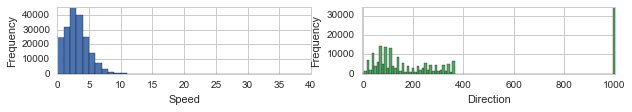

In [5]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [6]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date           HrMn            dir          speed  \
count  1.949340e+05  194934.000000  194934.000000  194934.000000   
mean   2.002263e+07    1114.988714     302.862359       2.588378   
std    9.666604e+04     691.731696     341.013584       1.814832   
min    1.980010e+07       0.000000       0.000000       0.000000   
25%    1.996091e+07     500.000000      50.000000       1.000000   
50%    2.004101e+07    1100.000000     190.000000       2.000000   
75%    2.010053e+07    1700.000000     340.000000       4.000000   
max    2.015123e+07    2300.000000     999.000000      27.000000   

        dir_windrose  
count  194934.000000  
mean      291.559446  
std       339.847648  
min         0.000000  
25%        70.000000  
50%       140.000000  
75%       300.000000  
max       999.000000

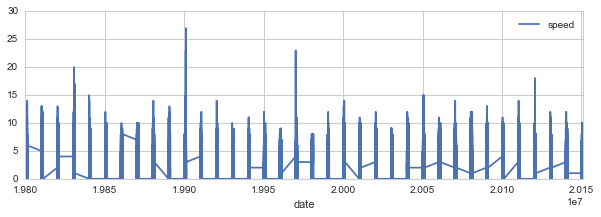

In [7]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

False


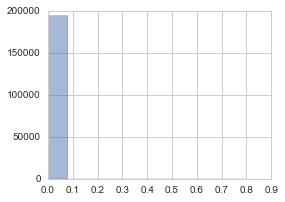

In [8]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal',ylabel='Frequency',legend={'loc':'best'})

print knot_unit

### 1.2.2 Sampling Type Selection

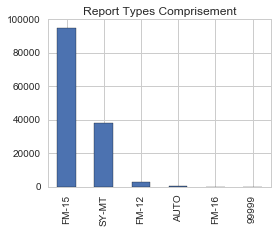

In [9]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

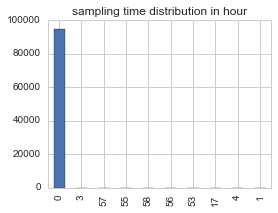

In [10]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution in hour', figsize=(4,3))

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [11]:
df['HrMn'].value_counts().sort_index()

0        734
100     5648
200     5670
300      781
400     5718
500     5694
600      718
700     5712
800     5737
900      788
1000    5695
1100    5698
1200     714
1300    5665
1400    5658
1500     824
1600    5549
1700    5303
1800     803
1900    5243
2000    5438
2100     857
2200    5639
2300    5615
Name: HrMn, dtype: int64

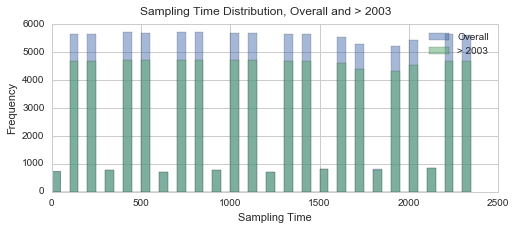

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [13]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  dir_windrose  decimal
106959  20001021   200  FM-15  341    4.0         N           109      0.0

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  dir_windrose  decimal  \
207597  20120808  1400  FM-15   30   18.0         N            60      0.0   
146663  20050806   500  FM-15    0   15.0         N            90      0.0   
207596  20120808  1300  FM-15   40   15.0         N            50      0.0   
144121  20050420   800  FM-15  210   15.0         N           240      0.0   
105185  20000719  1100  FM-15  250   14.0         N           200      0.0   
146662  20050806   400  FM-15   10   14.0         N            80      0.0   
146677  20050806  2000  FM-15   10   14.0         N            80      0.0   
196314  20110425   700  FM-15  210   14.0         N           240      0.0   
161955  20070517   500  FM-15  210   14.0         N           240      0.0   
179849  20090605  1100  FM-15    0   13.0         N            90      0.0   

        incre  incre_reverse  
207597    3.0            5.0  
146663    1.0            9.0  
207596    3.0           -3.0  
144121    3.0            6.0  
105185   12.0            9.0  
146662    3.0           -1.0  
146677    1.0            8.0  
196314    6.0            3.0  
161955    2.0            1.0  
179849    6.0           10.0

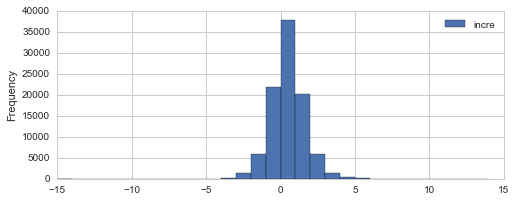

In [14]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [15]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 0


After Simple Aretefacts Handling

In [16]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn   type  dir  speed wind_type  dir_windrose  decimal  \
207597  20120808  1400  FM-15   30   18.0         N            60      0.0   
146663  20050806   500  FM-15    0   15.0         N            90      0.0   
207596  20120808  1300  FM-15   40   15.0         N            50      0.0   
144121  20050420   800  FM-15  210   15.0         N           240      0.0   
105185  20000719  1100  FM-15  250   14.0         N           200      0.0   
146662  20050806   400  FM-15   10   14.0         N            80      0.0   
146677  20050806  2000  FM-15   10   14.0         N            80      0.0   
196314  20110425   700  FM-15  210   14.0         N           240      0.0   
161955  20070517   500  FM-15  210   14.0         N           240      0.0   
179849  20090605  1100  FM-15    0   13.0         N            90      0.0   

        incre  incre_reverse  
207597    3.0            5.0  
146663    1.0            9.0  
207596    3.0           -3.0  
144121    3.0            6.0  
105185   12.0            9.0  
146662    3.0           -1.0  
146677    1.0            8.0  
196314    6.0            3.0  
161955    2.0            1.0  
179849    6.0           10.0

### 1.3.2 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print len(effective_column), SECTOR_LENGTH

0       4223
10      4885
20      5860
30      5856
40      3774
50      2548
60      1931
70      1668
80      1451
90      1001
100      933
110     1092
120     1462
130     1517
140     1725
150     1674
160     1676
170     1429
180     1457
190     1741
200     2594
210     3023
220     2071
230     1163
240      783
250      722
260      752
270      868
280      962
290     1061
300     1368
310     1713
320     2903
330     3794
340     4284
350     3027
999    16909
Name: dir, dtype: int64

36 10.0


In [18]:
if len(effective_column) == 16:    
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_column.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

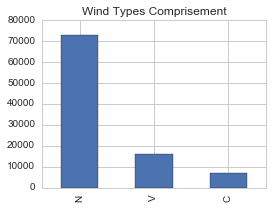

In [19]:
# Direction 999 handling
df['wind_type'].value_counts().plot(
    kind = 'bar', title = 'Wind Types Comprisement', figsize=(4,3))

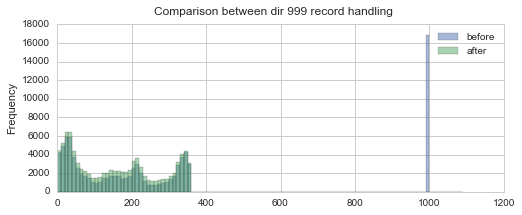

In [20]:
bins = arange(0, df.dir.max()+100,10)
df['dir'].plot(kind='hist', alpha=0.5, bins=bins, label='before')
df['dir'] = df.apply(lambda x: np.nan if x.dir == 999 else x.dir, axis=1)
df['dir'] = df['dir'].interpolate()//SECTOR_LENGTH*SECTOR_LENGTH
df['dir'].plot(kind='hist', alpha=0.5, bins=bins, label='after')
plt_configure(title='Comparison between dir 999 record handling', figsize=(8,3), legend={'loc':'best'})

### 1.3.3 Time Shift Comparison

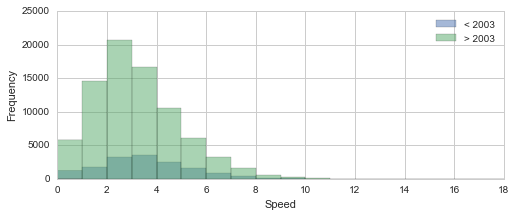

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

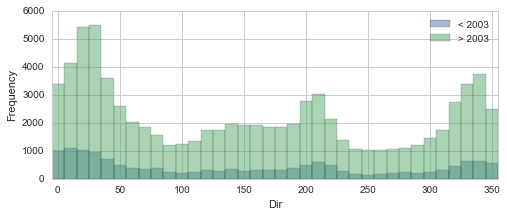

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1990 - 1994


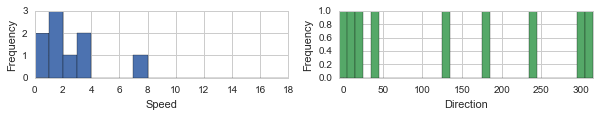

1995 - 1999


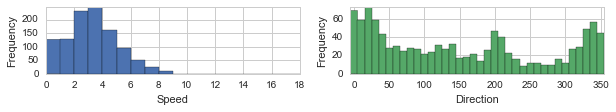

2000 - 2004


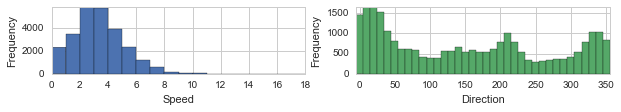

2005 - 2009


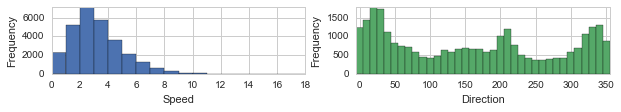

2010 - 2014


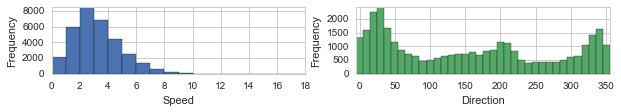

2015 - 2015


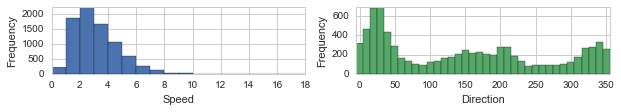

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

### 1.3.4 0 Speed

In [24]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print delete_zero, null_wind_frequency

False 0.0666628155508


## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

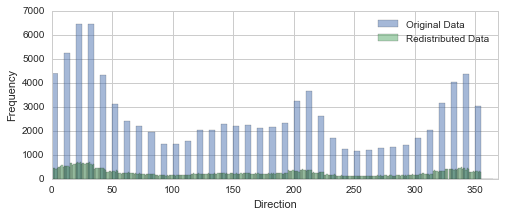

In [25]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


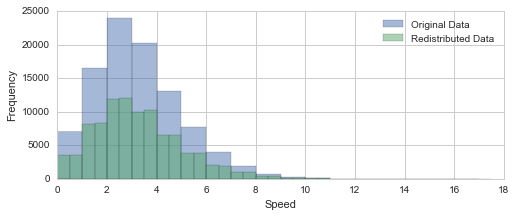

In [26]:
contain_zero = not delete_zero
df, speed_redistribution_info = randomize_speed(df, contain_zero)

## 1.5 Generate (x,y) from (speed,dir)

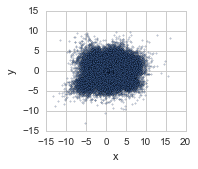

In [27]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
df.plot(kind='scatter', x='x', y='y', alpha=0.35, s=2, figsize=(2.5,2.5))
plt.gca().set_aspect('equal')

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [28]:
## Summery of the data selection
print 'Knot unit?', knot_unit
print 'Incre_threshold for artefact detection:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used
print 'delete_zero?', delete_zero
if 'speed_redistribution_info' in globals():
    print 'Speed redistribution info:', speed_redistribution_info 

df_all_years = df # for later across-year comparison
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

Knot unit? False
Incre_threshold for artefact detection: 10
Report type used: FM-15
Sampling time used: 0
delete_zero? False
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed  dir_windrose  \
count  3.274700e+04  32747.000000  32747.000000  32747.000000  32747.000000   
mean   2.012248e+07   1183.345039    154.449296      3.239054    284.046844   
std    1.436332e+04    690.443009    116.502062      1.745753    329.394915   
min    2.010010e+07      0.000000     -4.999695      0.000135      0.000000   
25%    2.011053e+07    550.000000     38.408332      2.018300     70.000000   
50%    2.012102e+07   1100.000000    146.814328      2.980513    130.000000   
75%    2.013123e+07   1800.000000    254.478723      4.245508    290.000000   
max    2.014123e+07   2300.000000    354.996805     18.082982    999.000000   

       decimal         incre  incre_reverse             x             y  
count  32747.0  32747.000000   32747.000000  32747.000000  32747.000000  
mean       0.0     -0.000031       0.000000      1.015321      0.171617  
std        0.0      1.132667       1.132681      2.899113      2.018471  
min        0.0     -7.000000      -9.000000    -12.058051     -7.862386  
25%        0.0     -1.000000      -1.000000     -1.107131     -1.264704  
50%        0.0      0.000000       0.000000      1.164697      0.289891  
75%        0.0      1.000000       1.000000      3.071538      1.586279  
max        0.0      9.000000       7.000000     16.014027      9.904572

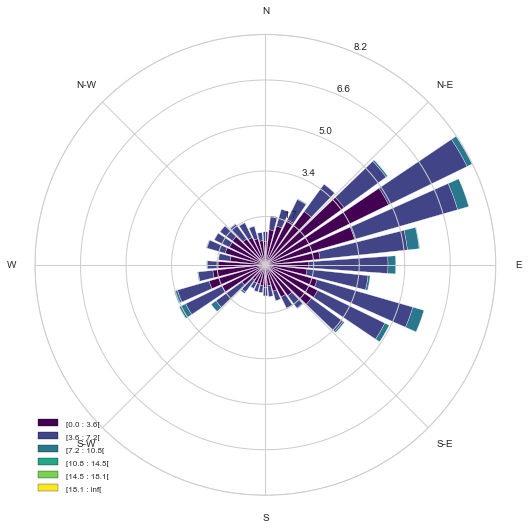

In [29]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [30]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARwAAADZCAYAAADypo9TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtcVHX+x/HXDDCCgouieA8IEy0vJaa1rqm5lFarG0EL
XtCN+rWau+ZSudoFWlfQraxM2U2zi6jLr9JKyVUzL6VbPxUV74yi5h1RUAZQucz8/phgQWEGcM6c
mcPn+XjMg8vMOd/PiLz5zplzvh+dxWKxIIQQTqBXuwAhRNMhgSOEcBoJHCGE00jgCCGcRgJHCOE0
EjhCCKfxVHLnFouFpKQksrOzMRgMzJo1iy5dulTdv27dOhYtWoRer+exxx4jLi7O7jZCCPel6Axn
w4YNlJaWkp6eTkJCAikpKVX3mc1m5s6dyyeffEJ6ejrLly/n8uXLNrcRQrg3RWc4mZmZDBo0CIA+
ffqwf//+qvv0ej3//ve/0ev1XLp0CYvFgpeXl81thBDuTdEZTlFREX5+flVfe3p6Yjab/zu4Xs83
33zDqFGj6N+/Pz4+Pna3EUK4L0VnOL6+vhQXF1d9bTab0etrZlxERAQRERFMmzaNL7/8Ej8/P7vb
3CgzM9OxhQsh6i08PLzej1U0cPr27cumTZsYPnw4e/bsoVu3blX3FRUVMXHiRBYvXozBYMDHxwe9
Xk/fvn3ZuHFjrdvY0pAn3RiZmZmKjqH0/mUM1xpDC8+hcoyGUDRwIiIi2LZtGzExMQCkpKSQkZHB
1atXiY6OZuTIkYwdOxYvLy/CwsIYNWoUAFu3bq2xjRBCGxQNHJ1Ox+uvv17jeyEhIVWfR0dHEx0d
fdN2N24jhNAGOfFPCOE0EjhCCKeRwBFCOI0EjhDCaSRwhBBOI4EjhHAaCRwhhNNI4AghnEYCRwjh
NBI4QginkcARQjiNBI4QwmkkcIQQTiOBI4RwGgkcIYTTSOAIIZxGAkcI4TQSOEIIp1F0iVEtqaio
wGg02n1caGgoHh4eTqhICPcjgVNPp0+fZsCAAiDExqOOk51NvTtNCNHUqNpbPCMjgyVLluDp6Um3
bt1ISkoCIDIyEl9fXwA6d+5McnKykmU2QAggYSJEYykaONX7hGdlZZGSkkJqaioA169fZ968eWRk
ZGAwGEhISGDTpk0MHDgQgCVLlihZmhBCBYoeNLbVJ9xgMJCeno7BYACgvLycZs2acfjwYUpKSoiP
j2fChAlkZWUpWaIQwokUneHU1Sdcr9ej0+lo3bo1AGlpaVy9epVf/vKXGI1G4uPjiY6O5sSJEzzz
zDOsW7fObrtfIYTrU7W3uMVi4e9//zs//fQT8+fPByA4OJigoKCqz/39/cnLy6Ndu3Y2x3KV/uL7
9+/HZDI1altnPAcZw3XG0MJzaCjVeosDvPrqq3h7e1cd1wFYsWIFRqORxMREcnNzKS4upm3btnbH
UrqH8k8//VSvx/Xs2bNR71Jpqde0jKH+/p05RkOo1lv8rrvuYuXKlYSHhzNu3Dh0Oh1xcXFER0cz
bdo0Ro8ejV6vJzk5WV5OCaERqvYWP3jwYK3bvfXWW0qWJYRQiUwdhBBOI4EjhHAaCRwhhNNI4Agh
nEYCRwjhNBI4QginkcARQjiNrIfTGAYTBBjB7AnX/OFKkNoVCeEWJHAawvMa9H8DBqWAT8F/v298
FDb+Dc43V682IdyABE49FZQVwMSREPATXPWH7ZOsM5wOu6Db19bb5slYLJPVLlUIlyWBUw9Xrl3h
byf+Zg2b7c/BxplwrdXP91og9Bt4dCIMmc/crFL+2e2f6HQ6VWsWwhXJQWM7SitKifw0khPXTsCO
GFjzXrWwAdBBzkPw0XdwMZiFhxby6qZX1SpXCJcmgWPHuz++y8bjG+nfsj+seQ2oY+Zi6gQfpxHs
F8ys72ex9uhap9YphDuQwLEhtyiXmd/NJMAngOc6PwcWO+1figJ5Z+A7GDwMjP9yPOeLzjunUCHc
hASODS9vfBlTqYmZQ2fi6+Fbr216tOrB33/9dy4UX2DClxOwWCwKVymE+5DAqcOuc7v4cPeH9Ars
xTPhzzRo2z8N+BPDuw5nXc46Pjv4mUIVCuF+JHDqkPx9MhYszH14Lp76hr2Zp9PpmD9iPgYPAy9+
8yIlZSUKVSmEe5G3xWtx6sopvjz8Jfe0v4dhIcMatY/Q1qFMGTCFN/7zBn9Z/Rcm96z7/JzQ0NDG
liqEW5HAqcX7me9TYalgcv/Jt3Q+TUzHGN4wfcB7uxbx3u+joLB9LY+ytgcWoimQl1Q3uF5+nYWZ
C2nt05rYnrG3tC9fL1/YmABe1+BXn2JtE3zjzVavciG0RdHAsVgsJCYmEhMTQ1xcHKdOnapxf0ZG
Bk8++SSjR4+u6itubxulfXbwM/JK8oi/Jx4fL59b32HWb6EgBPouAr8zt74/IdyYooFTvbd4QkIC
KSkpVfdV9hZfunQpy5cvx2QysWnTJpvbOMP7me+jQ8fEfhMds0OzF3w/AzxLYeAbjtmnEG7K5XqL
29pGaWcKz7D15FYGBw8mpJUDX+pkxcHlIAh/H3zlZEDRdCkaOHX1Fgfq7C1uaxulrTi0AoDoO6Md
u+MKA3w/3Xos5/65jt23EG7E5XqL29umLo7oofzR9o/QoSO0NLTR+6veW9zaHrin9Y49E2DoaxC+
ELa8BqW+NbYJCgrSTK9pGcM19u+sMRrC5XqL29umLrfaQ/ms6SxZGVkMChrEwwMfvun+xvQWrz5T
o6IZ7JgEQ5Pg7o9h++Qa25hMJs30mpYx1N+/M8doCJfrLV7bNs6w4uAKLFgc/3Kqup0TrasFDnjX
Gj4WOStBNC0u2Vv8xm2c4bODn6FDxxM9nlBukOJA2DsG+n4I3TIge6RyYwnhguRPLHCx5CJbT25l
4G0D6eDXQdnBfnze+vG+d5QdRwgXJIEDfHvsWyxYGNF1hPKDXegFx4dCyCZoc1j58YRwIRI4wPqc
9QA8FPqQcwbc+Qfrx/CFzhlPCBfR5APHYrHwzbFvCPAJ4J729zhn0MO/haJA67tVntecM6YQLqDJ
B072pWxOFZ5i2O3D8NDbWULUUSoMsDve2tvqLln7WDQdTT5wql5O3e6kl1OVMp8Biw76pTt3XCFU
1GTXw6moqCAnJ4cv9n4BQKguFKPReNPjQkND8fBQYOZzOQSOPgx3rMV42UgHD4XfHRPCBTTZGU5O
Tg5hdxrZfGI75N3O0L4dCQvjhttxcnJylCti19MArDi2QrkxhHAhTTZwAOh8BQwlcOxRVFkcy/gb
KG7FVye+osxcpuxYQriAph04t+20fjwxRJ3xKwywdxQF1wv4Lvc7dWoQwomaeODssn48OVC9GnZb
L6VYdWqVejUI4SRNNnDMFjN03gP5oVDcTr1CLnSjd0BvfrjwA2cKZQlSoW1NNnCOXjkKPoVw8ldq
l0LU7VGYMZO2N03tUoRQVJMNnMy8n9fxUPPl1M9G3DYCg97Ax3s+ltbAQtOabODsuvjz8ZtT6gdO
S0NLBrcfTPalbLaf2a52OUIoxmbgLF++3Fl1ON2uvF1Q4g8Xu6tdCgCPdX4MgE+yPlG5EiGUYzNw
Pvvss6rPx44dq3gxznLWdJbTxafh1D0us+regDYD6ODbgfT96Vwvv652OUIowuZvW/XjCUVFRYoX
4yzbTm6zfnKqr7qFVOOp92Rs77EUXCtgVba8RS60yWbgVO+rfSs9tl3ND6d/sH5y0nUCB2B8n/EA
LNm7ROVKhFCGzYs3i4uL2blzJ2azmZKSEnbu3Flj1nPvvfcqXqASdp7diV6nx3zuTrVLqeGuwLvo
26Eva4+u5ULxBQJbBKpdkhAOZTNw2rVrx7vvvgtAYGBg1edgnfEsWWL7L7HFYiEpKYns7GwMBgOz
Zs2iS5cuNR5

## 2.2 Create input data, i.e. speed_set

In [31]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
if 'params' not in globals():
    NUMBER_OF_GAUSSIAN = 3
    FIT_METHOD = 'square_error'
    KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [32]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


In [33]:
# plot_limit = ceil(df['speed'].quantile(.975))
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [34]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL = 'tophat'
# bandwidth = 1

In [35]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if KDE_GRIDSEARCH == True:
    if knot_unit:
        bandwidth_range = arange(0.5,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range},
                        n_jobs=-1, cv=4) 
    grid.fit(sample)
    bandwidth = grid.best_params_['bandwidth']

In [36]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

# bandwidth = 1.9
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 0.4 225
[  4.21569549e-05   1.72922158e-04   3.89873516e-04   6.46879912e-04
   6.94843928e-04]


In [37]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXm4FNWdBvxW78tdEAQd1ABijEgSVHBiTCRGMIPJKOA2
QgAdMG7jTFweRUWGgBrU5It+5hNFjdFAoogiuERnwuCSKBHUKEIEcTcYIYLcpfelvj+aX93Tp09V
nVq6b9e99T7PfZR7q0+d7q5667e+P0VVVRU+fPjw0U8R6O0N+PDhw0dvwidBHz589Gv4JOjDh49+
DZ8Effjw0a/hk6APHz76NXwS9OHDR7+GT4I+fPjo1/BJ0IcPH/0aPgn68OGjX8MnQR8+fPRr+CTo
w4ePfg2fBH348NGv4ZOgDx8++jV8EvThw0e/hk+CPnz46NfwSdCHDx/9Gj4J+vDho1/DJ0EfPnz0
a/gk6MOHj34NnwR9+PDRr+GToA8fPvo1fBL04cNHv4ZPgj58+OjX8EnQhw8f/Ro+Cfrw4aNfwydB
HzVQVRXlchmqqvb2Vnz4qDtCvb0BH82FcrmMYrGIbDYLRVG03ycSCQSDwV7cmQ8f9YFPgj40ZDIZ
dHV1IRaLIRAIQFVVZDIZlEollMtlBAIBhEIh7b8+KfroC/BJ0AdUVUWpVEKhUECpVEIul9NIr1wu
A4BmFRaLRaiqilwuh0AggGAw6JOiD09DUf3AT78Gub/lchm5XA7pdFp4nKIoCAaD2k8g0BNOpkvI
J0UfXoRPgv0YxWIRpVIJAJDL5ZBKpQAAwWAQ8XgcpVIJ2WxWmCDxSdFHX4FPgv0QqqpWEWA6nUYu
l9P+Ho/HEQqFqmKCiURCc5vphwWRIsUMWVLM5/PI5/OIx+OIRqM+KfpoKvgxwX6GcrmMQqGgEVp3
dzfK5TKCwSCi0aihO0yWHdBTRsOSYrFYRLFYBNBjBQaDQc0yJPL1Y4o+mgk+CfYTsFYckRARXjQa
RSKR0AhMBqw7TOvzpEiES6D/DwaDUBTFkBQjkUhViY4PH/WCT4L9APl8HsViUSt7SaVSKBQKUBQF
yWQSkUjE8TmMSJG1PMmNZi1FM1IMBoMIh8M+KfqoC3wS7OMolUro6OhAsVhEa2srUqkUyuUyQqEQ
WlpaqmJ3BDfCxDwp5vN5RCIRjQzL5XKVpWhEioVCAdlsFoVCAcFgEIlEwidFH67BJ8E+Ct79BYCu
ri4AlcRHLBaTIhE6RlVVx6RDsT9+f7KkmM/ntaRLNpv1LUUfrsAnwT4ItvaP3FKgQmgtLS0Ih8O9
vMPKXkKhkCVSpOPo9byl6JOiDzvwSbCPgbK0QCURkUqlNOJoa2szzMD2JmnIkCL9PpVKSbnPlGTx
SdGHEXwS7CMwqv2j9jcvkYCIFKmYm94PaynyhduKolQdQ4kWtp7RL8nxAfgk2CfA1v6Vy2V0d3ej
VCohEAigpaUFmUxGs6RkQPG/ZqqjJwIPBALCwm2+gFvUzcIq5EQiEU0ogsjWSw8JH+7BJ0GPg7X+
8vm8Zi1R7Z+iKE1zc7tJqmbusx4psmAtRSoG90mx/8EnQY8in88jk8lorl0qlUI+nwcAJJNJRKPR
Xt5hDxpBJkakSA8KlhRZN5q1FH1S7H/wSdCDIGGDdDqNWCym1f4Fg0G0tLToxrrMLLG+dJOzpBiN
RrXCbSJEVVW1hwag7z77pNj34ZOgh8B3XQBANpsFAMRiMcTjceGN6d+s0AhMURSUSiWEw2EEAgHL
MUUiRTo+FoshFotpGWof3oNPgh4BX/tH5AcALS0trrS+icAWS/cFsDJf4XBYq5nk+57NSJHIMBgM
akkn+ls4HPZJ0UPwSdADoP5boJII6e7u1m7mWCzmOgFSrR2bIe4rJKgHshRlSJFNNlEYgi/JAXqI
k8pxfFJsTvgk2MTga/8ymYxmAUYiEeTzeUs3lhmR0d95rUCg4nbTzUw3dF++qVlSVFVVt3g7n89r
FiH/2RApUuyRn8/Slz8/L8EnwSYFX/uXSqU0JZiWlhYtsO+WhUYWJgBNXYYk94kUWb1AI2XpvgYi
NZYUifxImcfos6HXE4GypEgJnL7+GTYzfBJsQrDWH9v6FolEkEgkEAgEqnT6zGBkcfDagkCPxQJA
Sx5QYTGbYRXd+P3BymHfGyll85aizAODwhy5XA7RaLSqeLuvf4bNBJ8EmwjFYhFdXV0IBAKayjO1
viUSCUSjUe3GsHOD8FYjWZgU/0skEkilUroZZt5FtKos7QTNHJMUWYpGnw1Liuz7Yi1FOsYnxfrD
J8EmAV382WwW4XBYc0Od1v7pgdxfVlvQypp2lKWLxaL2Ors3tBeIQOazYUkRgPb/vKXok2L94ZNg
L0Ok+0fEwba+OQH7et79ZesLrfQXi87B3/jsDc/XOIoED/oqrKpuG7nPxWLRJ0WX4ZNgL4Kv/ctk
MtrfzGr/7LrD3d3dmvvLawu6eROxHRuBQAC5XE5LBMjU4fXlG1pPdRuAaWiBJTuWFOnfoVBIixv3
5c/QTfgk2Etga//YqW9AJTFRj+JnSrAYSevzcLNYmnT9aD2j3l62xs7Nm7lZY4u86rZRaEFEiuVy
WStjIhUgtnjbJ0V9+CTYYPC1f9lsVrMAY7EYstms67V/dPOoqmrYXtdI6PX28j/k+vHK0m6c3wlY
hWu317Eab+UJTmQp+qSoD58EGwje/e3u7taSBS0tLQiFQlXtcEaQuYDZ+kKgQrKJRML0db1hLZkV
J9NDg95Tf6lRBORIkVAsFpFOpw3dZ36SH4Us+isp+iTYILDWH9v6Fg6HkUwmtVozwB0SovrCcrms
9bqSu9Xs0Cs5IYuZL07Wi5n1VYhIsVAoaBaf2dAqPtGSy+U0y5xNtPQXeOOu8DCo9i8YDCISiVS1
vtWj9o/EFYgw4vE4gErLnRVybSYiYd3hYDCIWCxmOWbWl8F+PiQKwX82Mp8PZfE7OztRLpfR2tra
L0YR+CRYR1DfKMm5Z7PZKtl7PctMtk5PdD62+Jmyv2662M0AI/eQwg16N32zJUbcii2yMFPdNiNF
+jzJ2mbd575oKfokWAeIdP+ojCESiSCZTLpOOKz7y2d/vUJudsGSIjvgXe+mB3oKt+3GwpqNTI1g
lRQJVKxPakJkKfY1UvRJ0GWwyQ8AVbV/MrL3Vm9IipWx7q/sYHU9UGLCqzCT2udjik5qFJvlAWPF
opQhRaBHsFf0+fQlUvRJ0EXw3RF87Z/s3A8rBEQkKCp+drJuXwJ70yuKgnw+ryVcRBnW/iQZBtSS
ItWT8rFFgiwp8nHKZoVPgi6Ar/1j29Ki0aiWfZOB7HFkxfAZZrdA1mBfU5YmUMAfqBVQbaRkWD1i
gm5AURTtoW11vClLilTOlEgksH79egwZMgRjxozprbclRN8usGoA2JkTVPuXTqc1y4zq8qyQiNGx
1F7X1dUFANp5jG5OOy52V1eXlmSh3zklwmYgUtEeqBSH6igpa0/dF5QcSKfTSKVSyGazjvqs64F6
kilZitTLzn4+1AZJ0w9TqRQymQzy+XxVL7SqqtiwYQM++ugjqfeyYMECnHPOOZg1axY++eSTqr+v
W7cOZ555Js455xysXLmy6m+7d+/GiSeeiA8++AAA8PHHH2P69OmYMWMGFi5cKDyfT4IOQDL0dKN0
dnaiUCggFAqhvb0dkUjE1YuSBquT+wvUdgs4XR/oGb7OiioUCgWk02lks1kUCgVLJNBsVg6gvye2
PjEWiyGZTCIejyMSiWiZU3L7AGhyZ+zvvA7WAxCB/3z0SJFiisViEc899xwymQxisZjp+deuXYt8
Po+HH34YV155JRYvXqz9rVgs4uabb8YDDzyAZcuWYcWKFdizZ4/2twULFlSdY/HixbjiiiuwfPly
lMtlrF27tvb

In [38]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [39]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [40]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.362   1.832   1.368  2.532  1.425   0.048
2  0.356  -1.118  -0.084  2.363  2.079   0.351
3  0.282   2.664  -1.043  2.282  1.729  -0.065

GMM Plot Result
0.362166123968 [[ 1.83218702  1.36814132]] [ 1.42263005  2.53372862] -87.7185705899
0.356235127693 [[-1.11810838 -0.08440192]] [ 1.76613169  2.60535342] -55.0378858957
0.281598748339 [[ 2.66362945 -1.0433654 ]] [ 1.72032288  2.28815273] -96.5497484139


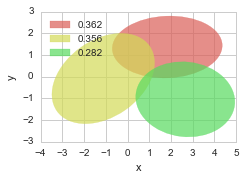

In [41]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [42]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXmYFNW5/tt7T3fPDIuSRINg0MQlCgp5boxXjIg3YqLg
liuIBNGoMXoN+nPXoKiXRL3XJF5xTUQlLgERjBqNBNF4IW4JKCQQb4ga0YCyzUzv1VW/P5rvzOma
Wk5t3VUz9T7PPOJM9anT3VVvfev7RRRFURAiRIgQAxTRVm8gRIgQIVqJkARDhAgxoBGSYIgQIQY0
QhIMESLEgEZIgiFChBjQCEkwRIgQAxohCYYIEWJAIyTBECFCDGiEJBgiRIgBjZAEQ4QIMaARkmCI
ECEGNEISDBEixIBGSIIhQoQY0AhJMESIEAMaIQmGCBFiQCMkwRAhQgxohCQYIkSIAY2QBEOECDGg
EZJgiBAhBjRCEgwRIsSARkiCIUKEGNAISTBEiBADGiEJhggRYkAjJMEQIUIMaIQkGCJEiAGNkARD
9IGiKJBlGYqitHorIUJ4jnirNxDCX5BlGZIkoVQqIRKJsN9nMhnEYrEW7ixECG8QkmAIhmKxiO7u
bqTTaUSjUSiKgmKxiFqtBlmWEY1GEY/H2X9DUgzRHxCSYAgoioJarYZqtYparYZyucxIT5ZlAGBW
oSRJUBQF5XIZ0WgUsVgsJMUQgUZECQM/Axrk/sqyjHK5jEKhoHlcJBJBLBZjP9FobziZLqGQFEME
ESEJDmBIkoRarQYAKJfLyOfzAIBYLIa2tjbUajWUSiXNBElIiiH6C0ISHIBQFKWBAAuFAsrlMvt7
W1sb4vF4Q0wwk8kwt5l+eBApUsyQJ8VKpYJKpYK2tjakUqmQFEP4CmFMcIBBlmVUq1VGaD09PZBl
GbFYDKlUytAdJssO6C2j4UlRkiRIkgSg1wqMxWLMMiTyDWOKIfyEkAQHCHgrjkiICC+VSiGTyTAC
EwHvDtP6alIkwiXQv2OxGCKRiCEpJpPJhhKdECG8QkiCAwCVSgWSJLGyl3w+j2q1ikgkgmw2i2Qy
6fgcRqTIW57kRvOWohkpxmIxJBKJkBRDeIKQBPs5arUadu3aBUmS0N7ejnw+D1mWEY/HkcvlGmJ3
BDfCxGpSrFQqSCaTjAxlWW6wFI1IsVqtolQqoVqtIhaLIZPJhKQYwjWEJNhPoXZ/AaC7uxtAPfGR
TqeFSISOURTFMelQ7E+9P1FSrFQqLOlSKpVCSzGEKwhJsB+Cr/0jtxSoE1oul0MikWjxDut7icfj
lkiRjqPXqy3FkBRD2EFIgv0MlKUF6omIfD7PiKOjo8MwA9tK0hAhRfp9Pp8Xcp8pyRKSYggjhCTY
T2BU+0ftb0EiAS1SpGJuej+8pagu3I5EIg3HUKKFr2cMS3JCACEJ9gvwtX+yLKOnpwe1Wg3RaBS5
XA7FYpFZUiKg+J+f6uiJwKPRqGbhtrqAW6ubhVfISSaTTCiCyDZID4kQ7iEkwYCDt/4qlQqzlqj2
LxKJ+ObmdpNUzdxnPVLkwVuKVAwekuLAQ0iCAUWlUkGxWGSuXT6fR6VSAQBks1mkUqkW77AXzSAT
I1KkBwVPirwbzVuKISkOPIQkGECQsEGhUEA6nWa1f7FYDLlcTjfWZWaJ9aebnCfFVCrFCreJEBVF
YQ8NQN99Dkmx/yMkwQBB3XUBAKVSCQCQTqfR1tameWOGNysYgUUiEdRqNSQSCUSjUcsxRSJFOj6d
TiOdTrMMdYjgISTBgEBd+0fkBwC5XM6V1jct8MXS/QG8zFcikWA1k+q+ZzNSJDKMxWIs6UR/SyQS
ISkGCCEJBgDUfwvUEyE9PT3sZk6n064ToKIo/Yb0REGWoggp8skmCkOoS3KAXuKkcpyQFP2JkAR9
DHXtX7FYZBZgMplEpVKxdGNZITa/lcg0Gzwp0kNBq3i7Uqkwi5Av3OZJkWKP6vksISn6AyEJ+hTq
2r98Ps+UYHK5HAvsu112EqIviNR4UiTyI2UeXktRrbpNrycC5UmREjhqde4QzUNIgj4Eb/3xrW/J
ZBKZTAbRaLRBp88MIbm5C/7zJKVstaVoRIpEdhTmKJfLSKVSDcXboaXYPIQk6CNIkoTu7m5Eo1Gm
8kytb5lMBqlUit0Ydm6QILu3ft67lqVopLrNkyL/vnhLkY4JSdF7hCToE9DFXyqVkEgkUC6XUavV
HNf+2YHfCcfvEFHd5kkRAPu32lIMSdF7hCTYYmjp/pGry7e+OYHV19dqNXR3dze8zs/E6HdYVd02
cp8lSQpJ0WWEJNhCqGv/isUi+5tZ7Z+XFzwvW0UgaSq1UksI69BT3QagaSlqyYbRsUSK9P/xeJzF
jcPvRwwhCbYIfO0fP/UNqGcNvSh+NrLmqP4QAJs9QrM+JElqyG4S1DVwQbjp/GrRqlW3jYZWaZGi
LMsolUpsVCpvKVJ3TBC+n1YgJMEmQ137VyqVmAWYTqdRKpU8q/3Tez0/eQ7ojUvJssxcMcqCGhUQ
6w1j9yOcEgKvcO32OlYn+akJTstSDElRHyEJNhFq97enp4dZWblcDvF4vKEdzghWLmC9Y0molG6S
bDbLrEEtmBUQa2VAyTIJYR8ipEiQJAmFQsHQfVZP8qMi7oFKiiEJNgm89ce3viUSCWSzWVZrBjTH
ZaM98JPnrBKrlbIQOifd0AP1hnMDWqRYrVbZw8xsaJU60VIul1nRNp9oGSgISdBjUO1fLBZDMpls
aH1rdu0fWW+8+8urz/BrWd2LG3OHQ9gDPYwAMFEIq5P8ALCZz11dXZBlGe3t7QNiFEFIgh6C+kZJ
zr1UKjXI3lMgXA0RYrNLmGr3l0/AuElEPClGIhGUy2UmTqB1Yw7UzLNbsUUedib58Z8/PcDIkufd
5/5oKYYk6AG0dP+ojCGZTCKbzTb1JqdzFYtFKIqCeDyObDbb9AuZV2mxMyPETwhSnNMqKRKoWJ+f
5EeeRH8ixZAEXQaf/ADQUPsnIntvlRzNbkaKF9G/jcRX+dd4fZOrb0wz6Sr13GG/wC8WqxWLUoQU
gV7BXi0rvT+RYkiCLoICzXRRqWv/ROd+uHWj8+4vACbA4EeI6PnR7/P5vO8txSBBTYok2KGOLRJE
SVEdp/QrQhJ0AeraPz7xkEqlWPZNBG4dx2d/qeZPLwYpcp5mW2DqchxZlplVrZauCnKSxYuYoBuI
RCLsoW01dMGTIj2wMpkMVq9ejWHDhmH06NGteluaCEnQIdS1f/l8ng3myWazTAzBahbXybHlcrlh
9CZNoxOBlzejXSLl3eFYLIZ0Om25o8LpHvwOL8nUSugCQB8LnUjx9ddfxyGHHGJKgoqi4IYbbsDG
jRuRTCZxyy23YPjw4ezvK1aswPz58xGPx3Hqqafi9NNPhyzLuO666/D3v/8d0WgUN954I/bbbz98
8MEHuOqqqxCNRrH//vtjzpw5fc4X+hEOIEkSK/+QJAldXV2oVquIx+Po7OxEMpls6hOeCrDz+Twr
wG52EkYLbp+fMs/JZBJtbW3IZrNoa2tjnRBEiKVSCfl8HsViEZVKpUGkotWfiZ9BbXd6IAs9nU4j
m82yUi8SieUVkYD6ffLSSy+hWCwinU6bnn/58uWoVCp4/PHHcdlll2HevHnsb5Ik4Uc/+hEWLFiA
Rx55BE888QS2b9+OFStWIBKJ4LHHHsMll1yCO+64AwAwb948XHrppVi4cCFkWcby5cv7nC+0BG2A
bjCyOPjWt7a2NqTT6T4XkagFYkXWnj8HxSCN5LdE1zW7CfwGrRpFI0sFgG7LmSj6q0VpB3rxXAoR
/fWvf8Xll18OAHjuuefw9NNP45hjjsEpp5yi+dm/9dZbOOqoowAAo0ePxrp169jf/va3v2HEiBHI
5XIAgLFjx+K

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQsAAADUCAYAAACLSgYcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAH25JREFUeJzt3X1QVNfdB/DvvrCsuuBr0EgNZYj4xMboA+Rl4tigDorR
JqawdlG0o0yniTWT+BKEYgBbcZHYxOlEEhhHU/EFHxOmJE6atBS1kckTAQXfrSUEDb5EhCewC7rs
7n3+IPdmF/bl7u7du3uX32cmU9i795wjZb+cc++558gYhmFACCFuyAPdAEKINFBYEEJ4obAghPBC
YUEI4YXCghDCizLQDeCjsbEx0E0gxKnExERe7zvTVAvGMtrle1QqFWbMmCFEswQnibAAgP956395
v7enpwcRERF+a4s/y5dy24dj+cveeIb3exnLaIyI3unyPX3tm3iXJzYahhBCeKGwIITwQmFBCOGF
woIQwguFBSGEFwoLQggvFBaEEF4CMs+ivLwctbW16O/vx/Lly5GWlhaIZhBCPCB6WJw+fRpnz55F
ZWUlent7sXfvXrGbQAjxguhhcerUKcTHx2Pt2rUwGo3Izs4WuwmEEC+IHhZdXV24efMmysrKcOPG
Dbzyyiv47LPP3J7X09PjUT2evt9T/ixfym2n8kOX6GExZswYxMXFQalUIjY2FuHh4ejs7MS4ceNc
nufJfP1ge34gWMqm8gNfvpSJfjckMTERX3zxBQDgzp07uH//PsaOHSt2MwghHhK9Z5GcnIyGhgak
p6eDYRgUFBRAJpOJ3QxCJIdhGBQWFuLq1atQqVQoKirClClTuOO1tbUoLS2FUqlEWloatFotrFYr
tmzZgtbWVsjlcmzduhWPPvooLl++jG3btkGhUEClUqGkpMRt7z4gt043bQrex3AJCVY1NTUwmUyo
rKxEc3Mz9Ho9SktLAQBmsxnFxcWoqqpCeHg4MjIyMH/+fJw5cwYymQyHDx/G6dOn8c4772D37t3Y
vn078vPzMW3aNBw5cgTl5eXIyclxWb9k1rMgZLhrbGzEnDlzAAAzZ87EhQsXuGMtLS2IiYmBRqMB
MDDcr6+vx8KFCzFv3jwAQHt7OyIjIwEA77zzDiZMmABgIGjCw8Pd1k9hQYhEGAwGu4uvSqUSVqsV
crl8yLFRo0Zxd3XkcjlycnJQU1ODP//5zwDABcWZM2dw6NAhHDhwwG39FBaESIRGo4HRaOS+Z4OC
PWYwGLhjRqOR60UAQHFxMe7duwetVotPP/0UarUan376KcrKylBeXs7rJgM9G0KIRCQkJODkyZMA
gKamJsTHx3PH4uLi0NbWhu7ubphMJjQ0NGDWrFmorq5GeXk5ACA8PBxyuRxyuRzV1dU4ePAgKioq
EB0dzat+6lkQIhEpKSmoq6uDTqcDAOj1ehw7dgx9fX3QarXIzc3FmjVrwDAM0tPTERUVhQULFiA3
NxeZmZkwm83Iy8uDUqnE9u3bMXnyZPzud7+DTCbDU089hXXr1rmsn8KCEImQyWTYunWr3WuxsbHc
18nJyUhOTrY7PmLECOzatWtIWV999ZXH9dMwhBDCC4UFIYQXCgtCCC8UFoQQXigsCCG80N0QQkR0
vfe6y+MPidQOb1BYECKiM/eXujy+UKR2eIOGIYQQXigsCCG8UFgQQngJWFjcu3cPycnJaG1tDVQT
CCEeCEhYmM1mFBQUQK1WB6J6QogXAhIWO3bsQEZGBqKiogJRPSHEC6LfOq2qqsL48eMxe/ZsvP/+
+7zPo31DqPxQKV+qAhIWMpkMdXV1uHLlCjZv3oz33nsP48ePd3ke7RtC5YdC+VImeljYrvW3cuVK
/OEPf3AbFISQwAvoDE7aLyT4nTc/GPLaDKX7laBJ6AloWOzfvz+Q1RMnbAMibvrQ9RnPX2p3eq4l
TA4FBUxIomdDCIChPQhHIcHnmLMxv6uAoSCRBgqLYcyTgPCVs7JbLrXbtYOCI3hRWAwzLYOGCf4M
CD5s66fgCG4UFsOAmD0IX1BwBDcKixDk6A4G+0GUyoQjZ8FhCZNjVqAaNcxRWIQIqfQevGH7b/n3
uTbu30q9DXFRWAQ5R70ER0IpHFx5OHYcIiIiuN4GBYZ4KCyCyHnzgyHzFIZLCHiK/bmwt2QpNPyP
wiJIsD0I9i9nsGpkOlweN6stUDLOe0OJsgmCtiduerTdNQ0KDf+hsAgw9pc8GC9AOguGqbHOlxZw
9yBWY+t3Dl/3JUTYnx2Fhn9RWATQ4KAIFmxIuAoFbzkr0zZEvA0OCg3/ojU4A+C8+QHOmx8gbnp0
UAVFI9Ph16BwZWpsFFenbTu8Yftz5XuBWAoYhkFBQQF0Oh1WrVqFGzdu2B2vra1Feno6dDodjh49
CmBgVbrs7GysWLECy5YtQ21trd05n3zyCXQ6Ha/6qWchsmDsTdh+MH0JieawdlgizVAou+1en9nP
/9/K1n+t9TuuXb70NELprklNTQ1MJhMqKyvR3NwMvV6P0tJSAAOhUFxcjKqqKoSHhyMjIwPz58/H
iRMnMHbsWJSUlOD777/H0qVLMW/ePADApUuX8NFHH/Gun8JCJO6e5AwEIUKiOezHB8Qee/ghh9cs
mm85f4gMcBwmtu2xHaLEw7MPfSgFRmNjI+bMmQMAmDlzJi5cuMAda2lpQUxMDDQaDQAgMTER9fX1
WLRoEVJTUwEAVqsVSuXAR76rqwu7du1CXl4e3nzzTV71U1iIINh6E76GhG1AAAMh4Yqr45dv3eXK
c9YDse1tXFL3Qsk88Ki3ESqBYTAY7IJYqVTCarVCLpcPOTZq1Cj09PRgxIgR3LmvvfYa1q9fD6vV
ii1btiAnJwcqlQoMw/CqX/SwMJvN+P3vf4/29nb09/fj5Zdf5rpFoShYgoINCLPaAiUUHoeEpwHB
F1sOGxquhixTY6PQ09OD2x19aGQ6JBkYF7vuuDy+0MWC9xqNBkajkfueDQr2mMFg4I4ZjUZERkYC
AG7duoV169YhMzMTzz//PM6dO4fr16+jsLAQDx48QEtLC/R6PXJzc122TfSw+Pjjj52OoUJNoINi
8EVC9sPmyTyOwcMMV+QjzkKjskCuUAAArH3/zbsetmx2yOIuNNhrGlILDLc/ExdhkZCQgOPHjyM1
NRVNTU2Ij4/njsXFxaGtrQ3d3d1Qq9Wor69HVlYWOjo6kJWVhfz8fDzzzDMAgCeeeAKffPIJAKC9
vR0bN250GxRAAMLC2Rgq1AQiKByFg7c8DQlWrDoCEZqBMLqIs85Ocfqheezhh3gPTby5CBoMgeGt
lJQU1NXVcXcv9Ho9jh07hr6+Pmi1WuTm5mLNmjVgGAZarRZRUVEoKipCd3c3SktLsXv3bshkMuzZ
swcqlcrj+mUM3wGLwAwGA9auXQudTofnn3/e5XsbGxvxP2/9L++yA70CtC9Bwbftjm4t8gkHPuWz
H1RPQuJnYycOlG/o4cLClcHdcUfhcfnWXQD2geGo/dd+uADqSS+jxck0cU9/d5a98QwSExN5vbex
sRE7u664fM+msf/FuzyxBeTP+uAxFB9S2jfEEibHw7HjvG7D4PMuqXsdvu8nkzS828TnfdciOwEA
MT9cUXdVnmb8VVgsAz0JYCAkuPIN7tvxSNhI7uvW+z0wOKjrJxo12v7PgDOyNkztHue0/ZMmjMC3
tw3ouc//5x01JRK3WjvRZDYjrt9qdyyYZtEGE9HDwtEYig8p7RuiMD/wuv6v+u9AqVTYvebNBUln
nLW9OawdCih5Xbgc6FEouN6EXfk8exa2FP29GB31H4e9i8cjInD51l2uzc7ar+zo8/hnHvHEwNOr
Eeofexe0b4hzoodFWVmZYGOoYMTOzPRGoGZP8h12AD8OPRwFhbd+Nnai27sEfHh6wZN4RvSwyMvL
Q15entjVSsb

## Goodness-of-fit Statistics

In [43]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.908  0.018      0.082  0.000004      0.058       0.469

# 5. GMM by Optimization

In [44]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print FIT_METHOD

square_error


In [45]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -13.383201854001623
     jac: array([ -9.73323345e-01,   1.19209290e-07,   1.19209290e-07,
        -9.53674316e-07,  -3.57627869e-07,   8.34465027e-07,
        -9.73331690e-01,  -1.19209290e-07,  -3.21865082e-06,
        -1.19209290e-07,  -2.38418579e-07,   9.53674316e-07,
        -9.73327756e-01,  -2.38418579e-07,  -1.19209290e-07,
         1.19209290e-07,  -1.19209290e-07,  -5.96046448e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1428
     nit: 70
    njev: 70
  status: 0
 success: True
       x: array([ 0.10715297, -1.31949135, -0.12478506,  1.16560497,  0.92540877,
        0.38049137,  0.08950914,  2.41355687,  1.48799503,  0.98533076,
        0.44880399,  0.08795036,  0.80333789,  1.40329917,  0.13514972,
        3.07389908,  2.28196409, -0.06982538])

## 5.1 GMM Result

In [46]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.803   1.403   0.135  3.074  2.282  -0.070
2  0.107  -1.319  -0.125  1.166  0.925   0.380
3  0.090   2.414   1.488  0.985  0.449   0.088

GMM Plot Result
0.803337894662 [[ 1.40329917  0.13514972]] [ 2.26969943  3.08296613] -96.5022936571
0.107152965159 [[-1.31949135 -0.12478506]] [ 0.7914247   1.26042187] -60.73072546
0.0895091401786 [[ 2.41355687  1.48799503]] [ 0.44661401  0.98632533] -87.1136787014


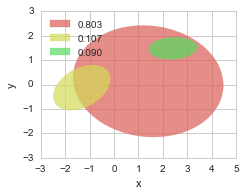

In [47]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)
# fig_gmm.savefig('foo.pdf')

## 5.2 Goodness-of-fit statistics

In [48]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.967  0.034      0.126  0.000002      0.035       0.282

In [49]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXu8FWW9/jOz7pe9N5ekjoqgaEakkODvZKUlYEcsBTVP
QogGJ1GzU2iK1xCUsPSjHT3S0TQ1yUsggpeOJZG3I4mXRCUlL4FGKiqwL+s+a83vj8V39rveNZd3
Zs2stWbveT4fPgp71jvvmj3zzPf6fCVVVVUECBAgwCCF3OoNBAgQIEArEZBggAABBjUCEgwQIMCg
RkCCAQIEGNQISDBAgACDGgEJBggQYFAjIMEAAQIMagQkGCBAgEGNgAQDBAgwqBGQYIAAAQY1AhIM
ECDAoEZAggECBBjUCEgwQIAAgxoBCQYIEGBQIyDBAAECDGoEJBggQIBBjYAEAwQIMKgRkGCAAAEG
NQISDBAgwKBGQIIBAgQY1AhIMECAAIMaAQkGCBBgUCMgwQABAgxqBCQYIECAQY2ABAMECDCoEZBg
gDqoqopKpQJVVVu9lQABPEe41RsI0F6oVCpQFAX5fB6SJGn/nkwmEQqFWrizAAG8QUCCATTkcjn0
9vYiHo9DlmWoqopcLodyuYxKpQJZlhEOh7X/BqQYYCAgIMEAUFUV5XIZpVIJ5XIZhUJBI71KpQIA
mlWoKApUVUWhUIAsywiFQgEpBvA1JDUI/AxqkPtbqVRQKBSQzWZ1j5MkCaFQSPsjy/3hZLqFAlIM
4EcEJDiIoSgKyuUyAKBQKCCTyQAAQqEQEokEyuUy8vm8boIkIMUAAwUBCQ5CqKpaQ4DZbBaFQkH7
eSKRQDgcrokJJpNJzW2mPyyIFClmyJJisVhEsVhEIpFALBYLSDFAWyGICQ4yVCoVlEoljdD6+vpQ
qVQQCoUQi8VM3WGy7ID+MhqWFBVFgaIoAPqtwFAopFmGRL5BTDFAOyEgwUEC1oojEiLCi8ViSCaT
GoGJgHWHaX2eFIlwCfT/oVAIkiSZkmI0Gq0p0QkQwCsEJDgIUCwWoSiKVvaSyWRQKpUgSRJSqRSi
0WjD5zAjRdbyJDeatRStSDEUCiESiQSkGMATBCQ4wFEul9Hd3Q1FUdDR0YFMJoNKpYJwOIx0Ol0T
uyO4ESbmSbFYLCIajWpkWKlUaixFM1IslUrI5/MolUoIhUJIJpMBKQZwDQEJDlDw7i8A9Pb2Aqgm
PuLxuBCJ0DGqqjZMOhT74/cnSorFYlFLuuTz+cBSDOAKAhIcgGBr/8gtBaqElk6nEYlEWrzD6l7C
4bAtUqTj6PO8pRiQYgAnCEhwgIGytEA1EZHJZDTi6OzsNM3AtpI0REiR/j2TyQi5z5RkCUgxgBkC
EhwgMKv9o/Y3P5GAHilSMTd9H9ZS5Au3JUmqOYYSLWw9Y1CSEwAISHBAgK39q1Qq6OvrQ7lchizL
SKfTyOVymiUlAor/tVMdPRG4LMu6hdt8AbdeNwurkBONRjWhCCJbP70kAriHgAR9Dtb6KxaLmrVE
tX+SJLXNw+0mqVq5z0akyIK1FKkYPCDFwYeABH2KYrGIXC6nuXaZTAbFYhEAkEqlEIvFWrzDfjSD
TMxIkV4ULCmybjRrKQakOPgQkKAPQcIG2WwW8Xhcq/0LhUJIp9OGsS4rS2wgPeQsKcZiMa1wmwhR
VVXtpQEYu88BKQ58BCToI/BdFwCQz+cBAPF4HIlEQvfBDB5WaAQmSRLK5TIikQhkWbYdUyRSpOPj
8Tji8biWoQ7gPwQk6BPwtX9EfgCQTqddaX3TA1ssPRDAynxFIhGtZpLve7YiRSLDUCikJZ3oZ5FI
JCBFHyEgQR+A+m+BaiKkr69Pe5jj8bjrBKiq6oAhPVGQpShCimyyicIQfEkO0E+cVI4TkGJ7IiDB
NgZf+5fL5TQLMBqNolgs2nqw7BBbu5XINBssKdJLQa94u1gsahYhW7jNkiLFHvn5LAEptgcCEmxT
8LV/mUxGU4JJp9NaYN/tshOgSpaUDBjMREggUmNJkciPlHlYLUVedZs+TwTKkiIlcHh17gDNQ0CC
bQjW+mNb36LRKJLJJGRZrtHps4Jdi4Naz/h/IyIY7GCvJyll85aiGSnSNaQwR6FQQCwWqyneDizF
5iEgwTaCoijo7e2FLMuayjO1viWTScRiMe3BcPKAWFl1ZKGoqqrJ67NkTNZhK+Jc7WyR6lmKZqrb
LCmy34u1FOmYgBS9R0CCbQK6+fP5PCKRCAqFAsrlcsO1fyJQVbWGcEmzr1KpIJ/PQ1GUGlI0ktFv
xoPqByIQUd1mryEA7f95SzEgRe8RkGCLoaf7R64o2/rWCMw+T3NGqNeY5g3zn6WyDysZ/WaToh9g
V3XbzH1WFCUgRZcRkGALwdf+5XI57WdWtX9u3PDsmM1YLIZEIoHdu3ebfkbvgTbTAWQt2HZ2aZsJ
I9VtALqWotGLhSVF+ns4HNbixgEpiiEgwRaBrf1jp74B1ayhF8XP7NQ31v2lXmOj+cLsZ/V+biVk
QCgWi5qLz0peNRPtSsS86rZda5tCFxS2YC1F6o4JSFEfAQk2GXztXz6f1yzAeDyOfD7vWe0fUOv+
WsUbnUCPFAuFgpZd5omRXDm2lKQZaPQ8rMK12+vYneTHE5yepRiQojECEmwiePe3r69PI4d0Oo1w
OFzTDmcGOzcwHVsqldDX1wfAPN7odu1hKBSCoiiIRqMIhUK2S0kGO0RIkaAoCrLZrKn7zE/yoyLu
wUqKAQk2Caz1x7a+RSIRpFIprdYMcN9lo/V497cVMOvEIELkSZEe0gBV6JFiqVTSLD6roVV8oqVQ
KGgWPJtoGSwISNBjUO1fKBRCNBqtaX1rRu0fyW4B1Yeho6ND6AZvlgagnfo6oN+aDrKh/WCL2EkU
wu4kPwDazOeenh5UKhXtXhnopBiQoIegvlGSc8/n8zWy9xQ34yFiCYoQAJv9BaBJPjWyppcwc/v0
FHQGQjmOW7FFFk4m+bHXka47vYBY93kgWooBCXoAPd0/KmOIRqNIpVKePrB89jcWi2kuj5/AkmIk
EqmZMmdUjtOszHO7Zpn1YJcUCZQ8Yyf5UaJrIJFiQIIug01+AKip/ROJxdl9cPmHUS/7S29zO2u2
60MuSZJ2De0OW/KCFNvlxWLHohQhRaBfsFfvOg4kUgxI0EWQ20Y3FV/7J5qMcEpAfPEzZX8pptau
xOYURg8zO1OEL8fxKvnkZ/DXkQQ7+NgiQZQU+ThluyIgQRfA1/4VCgVks1kA9l1RJ8cZFT+7AT8p
S/MPs16ShcD2ZreyHMeLmKAbaNTipmcik8lovegbNmzAiBEjMH78+FZ9LV0EJNgg+Nq/TCajqa2k
UilNDMEOidg5tlKpoKenx7T42UlNoRdoNpHqlePk83nNOjcqx/FjksVLMrV6uRiRIr1YiBQ3btyI
Qw45xJIEVVXFFVdcgS1btiAajWLp0qUYOXKk9vP169dj+fLlCIfDOPnkk3HKKaegUqngsssuw9//
/nfIsozFixfjwAMPxGuvvYb58+dj9OjRAICZM2di2rRpNecLSLAB8LV/NPUtHA4jnU43xbqgB9ot
sQUv0A57onKcUKg6EyQej9d0sLRaHaedoKqq6b1rZxQBUH02/vSnPyGXyyEej1uef926dSgWi7j3
3nuxadMmLFu2DMuXL9fWuvrqq7F69WrEYjHMnDkTU6ZMwYsvvghJknDPPfdg48aNuO6667B8+XK8
+uqrmDt3Ls444wzD8wUk6AClUgn5fF57UNjWt0QioT1gLEStIBE1Z3J/CaLur+geqPd0IMNJaxpf
RhKgCiNSJCPhb3/7Gy644AIAwO9+9zs8+OCDOProo3HSSSfp3mcvvPACjjzySADA+PHj8eqrr2o/
e+uttzBq1Ci

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQsAAADUCAYAAACLSgYcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAH25JREFUeJzt3X1QVNfdB/DvvrCsuuBr0EgNZYj4xMboA+Rl4tigDorR
JqawdlG0o0yniTWT+BKEYgBbcZHYxOlEEhhHU/EFHxOmJE6atBS1kckTAQXfrSUEDb5EhCewC7rs
7n3+IPdmF/bl7u7du3uX32cmU9i795wjZb+cc++558gYhmFACCFuyAPdAEKINFBYEEJ4obAghPBC
YUEI4YXCghDCizLQDeCjsbEx0E0gxKnExERe7zvTVAvGMtrle1QqFWbMmCFEswQnibAAgP956395
v7enpwcRERF+a4s/y5dy24dj+cveeIb3exnLaIyI3unyPX3tm3iXJzYahhBCeKGwIITwQmFBCOGF
woIQwguFBSGEFwoLQggvFBaEEF4CMs+ivLwctbW16O/vx/Lly5GWlhaIZhBCPCB6WJw+fRpnz55F
ZWUlent7sXfvXrGbQAjxguhhcerUKcTHx2Pt2rUwGo3Izs4WuwmEEC+IHhZdXV24efMmysrKcOPG
Dbzyyiv47LPP3J7X09PjUT2evt9T/ixfym2n8kOX6GExZswYxMXFQalUIjY2FuHh4ejs7MS4ceNc
nufJfP1ge34gWMqm8gNfvpSJfjckMTERX3zxBQDgzp07uH//PsaOHSt2MwghHhK9Z5GcnIyGhgak
p6eDYRgUFBRAJpOJ3QxCJIdhGBQWFuLq1atQqVQoKirClClTuOO1tbUoLS2FUqlEWloatFotrFYr
tmzZgtbWVsjlcmzduhWPPvooLl++jG3btkGhUEClUqGkpMRt7z4gt043bQrex3AJCVY1NTUwmUyo
rKxEc3Mz9Ho9SktLAQBmsxnFxcWoqqpCeHg4MjIyMH/+fJw5cwYymQyHDx/G6dOn8c4772D37t3Y
vn078vPzMW3aNBw5cgTl5eXIyclxWb9k1rMgZLhrbGzEnDlzAAAzZ87EhQsXuGMtLS2IiYmBRqMB
MDDcr6+vx8KFCzFv3jwAQHt7OyIjIwEA77zzDiZMmABgIGjCw8Pd1k9hQYhEGAwGu4uvSqUSVqsV
crl8yLFRo0Zxd3XkcjlycnJQU1ODP//5zwDABcWZM2dw6NAhHDhwwG39FBaESIRGo4HRaOS+Z4OC
PWYwGLhjRqOR60UAQHFxMe7duwetVotPP/0UarUan376KcrKylBeXs7rJgM9G0KIRCQkJODkyZMA
gKamJsTHx3PH4uLi0NbWhu7ubphMJjQ0NGDWrFmorq5GeXk5ACA8PBxyuRxyuRzV1dU4ePAgKioq
EB0dzat+6lkQIhEpKSmoq6uDTqcDAOj1ehw7dgx9fX3QarXIzc3FmjVrwDAM0tPTERUVhQULFiA3
NxeZmZkwm83Iy8uDUqnE9u3bMXnyZPzud7+DTCbDU089hXXr1rmsn8KCEImQyWTYunWr3WuxsbHc
18nJyUhOTrY7PmLECOzatWtIWV999ZXH9dMwhBDCC4UFIYQXCgtCCC8UFoQQXigsCCG80N0QQkR0
vfe6y+MPidQOb1BYECKiM/eXujy+UKR2eIOGIYQQXigsCCG8UFgQQngJWFjcu3cPycnJaG1tDVQT
CCEeCEhYmM1mFBQUQK1WB6J6QogXAhIWO3bsQEZGBqKiogJRPSHEC6LfOq2qqsL48eMxe/ZsvP/+
+7zPo31DqPxQKV+qAhIWMpkMdXV1uHLlCjZv3oz33nsP48ePd3ke7RtC5YdC+VImeljYrvW3cuVK
/OEPf3AbFISQwAvoDE7aLyT4nTc/GPLaDKX7laBJ6AloWOzfvz+Q1RMnbAMibvrQ9RnPX2p3eq4l
TA4FBUxIomdDCIChPQhHIcHnmLMxv6uAoSCRBgqLYcyTgPCVs7JbLrXbtYOCI3hRWAwzLYOGCf4M
CD5s66fgCG4UFsOAmD0IX1BwBDcKixDk6A4G+0GUyoQjZ8FhCZNjVqAaNcxRWIQIqfQevGH7b/n3
uTbu30q9DXFRWAQ5R70ER0IpHFx5OHYcIiIiuN4GBYZ4KCyCyHnzgyHzFIZLCHiK/bmwt2QpNPyP
wiJIsD0I9i9nsGpkOlweN6stUDLOe0OJsgmCtiduerTdNQ0KDf+hsAgw9pc8GC9AOguGqbHOlxZw
9yBWY+t3Dl/3JUTYnx2Fhn9RWATQ4KAIFmxIuAoFbzkr0zZEvA0OCg3/ojU4A+C8+QHOmx8gbnp0
UAVFI9Ph16BwZWpsFFenbTu8Yftz5XuBWAoYhkFBQQF0Oh1WrVqFGzdu2B2vra1Feno6dDodjh49
CmBgVbrs7GysWLECy5YtQ21trd05n3zyCXQ6Ha/6qWchsmDsTdh+MH0JieawdlgizVAou+1en9nP
/9/K1n+t9TuuXb70NELprklNTQ1MJhMqKyvR3NwMvV6P0tJSAAOhUFxcjKqqKoSHhyMjIwPz58/H
iRMnMHbsWJSUlOD777/H0qVLMW/ePADApUuX8NFHH/Gun8JCJO6e5AwEIUKiOezHB8Qee/ghh9cs
mm85f4gMcBwmtu2xHaLEw7MPfSgFRmNjI+bMmQMAmDlzJi5cuMAda2lpQUxMDDQaDQAgMTER9fX1
WLRoEVJTUwEAVqsVSuXAR76rqwu7du1CXl4e3nzzTV71U1iIINh6E76GhG1AAAMh4Yqr45dv3eXK
c9YDse1tXFL3Qsk88Ki3ESqBYTAY7IJYqVTCarVCLpcPOTZq1Cj09PRgxIgR3LmvvfYa1q9fD6vV
ii1btiAnJwcqlQoMw/CqX/SwMJvN+P3vf4/29nb09/fj5Zdf5rpFoShYgoINCLPaAiUUHoeEpwHB
F1sOGxquhixTY6PQ09OD2x19aGQ6JBkYF7vuuDy+0MWC9xqNBkajkfueDQr2mMFg4I4ZjUZERkYC
AG7duoV169YhMzMTzz//PM6dO4fr16+jsLAQDx48QEtLC/R6PXJzc122TfSw+Pjjj52OoUJNoINi
8EVC9sPmyTyOwcMMV+QjzkKjskCuUAAArH3/zbsetmx2yOIuNNhrGlILDLc/ExdhkZCQgOPHjyM1
NRVNTU2Ij4/njsXFxaGtrQ3d3d1Qq9Wor69HVlYWOjo6kJWVhfz8fDzzzDMAgCeeeAKffPIJAKC9
vR0bN250GxRAAMLC2Rgq1AQiKByFg7c8DQlWrDoCEZqBMLqIs85Ocfqheezhh3gPTby5CBoMgeGt
lJQU1NXVcXcv9Ho9jh07hr6+Pmi1WuTm5mLNmjVgGAZarRZRUVEoKipCd3c3SktLsXv3bshkMuzZ
swcqlcrj+mUM3wGLwAwGA9auXQudTofnn3/e5XsbGxvxP2/9L++yA70CtC9Bwbftjm4t8gkHPuWz
H1RPQuJnYycOlG/o4cLClcHdcUfhcfnWXQD2geGo/dd+uADqSS+jxck0cU9/d5a98QwSExN5vbex
sRE7u664fM+msf/FuzyxBeTP+uAxFB9S2jfEEibHw7HjvG7D4PMuqXsdvu8nkzS828TnfdciOwEA
MT9cUXdVnmb8VVgsAz0JYCAkuPIN7tvxSNhI7uvW+z0wOKjrJxo12v7PgDOyNkztHue0/ZMmjMC3
tw3ouc//5x01JRK3WjvRZDYjrt9qdyyYZtEGE9HDwtEYig8p7RuiMD/wuv6v+u9AqVTYvebNBUln
nLW9OawdCih5Xbgc6FEouN6EXfk8exa2FP29GB31H4e9i8cjInD51l2uzc7ar+zo8/hnHvHEwNOr
Eeofexe0b4hzoodFWVmZYGOoYMTOzPRGoGZP8h12AD8OPRwFhbd+Nnai27sEfHh6wZN4RvSwyMvL
Q15entjVSsb

In [50]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

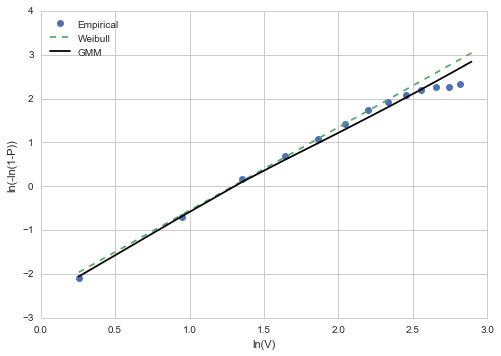

In [51]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


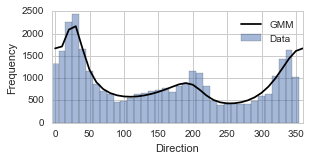

In [52]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(zip(*y_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print title

Speed Distribution Comparison


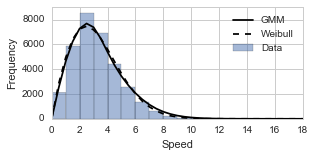

In [53]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(zip(*y_)[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print title

In [54]:
incre = SECTOR_LENGTH 
density_collection =[]
for angle in arange(0, 360, incre):
    angle_radian, incre_radian = radians(angle), radians(incre)  
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
    data_size = len(sub_df.speed)    
        
    bins = arange(0, sub_df.speed.max()+1)

    density_, division = np.histogram(sub_df['speed'],bins=bins)
    density = density_/len(df)
    density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                        for x_ in bins[:-1]]
    density_expected = array(zip(*density_expected_ )[0])
    fig = plt.figure(figsize=(1.5,1.5))
    plot(bins[1:], density)
    plot(bins[1:], density_expected)
    
    curves = {'angle': angle, 'data_size': data_size, 
          'density': density, 'density_expected': density_expected}
    density_collection.append(curves)
    title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
    plt_configure(title = title)
align_figures()

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJIAAAB6CAYAAABUbAphAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXdYVEfbh+9dll5FRUUUFESsiGBv2I2xxIKKPRoTNTGJ
8U0Qu0aRJK8xsUVNjyWWWBJN0SCxoUFAQFBABZEmRQGRzu6e7w/ivhLKwrK7oB/3dXld7p6ZZ545
zM6Z85tnZkSCIAg00EAtEde1Aw28GDQ0pAbUQkNDakAtNDSkBtRCQ0NqQC00NKQG1IJEU4bPnz/P
p59+SklJCe3bt2fTpk0YGxurnA5gy5Yt9O7dm379+pW75uvry5kzZ7CwsACgTZs2fPrpp7UqrzJu
377N1KlTsbOzU3y3devWMp8BMjMz8fLyIiUlBbFYzIYNG3BxcSE/P5933nmHnTt3oqenV87+rFmz
SElJwczMDEEQkEql9OjRg//85z819lVrCBrg0aNHQp8+fYSEhARBEAThk08+EdatW6dyOkEQhLCw
MGHRokWVljl16lQhNDRULX4p49ChQ8Lq1auVpnvnnXeEPXv2CIIgCFFRUcKAAQOEwsJCQRAE4eTJ
k4Kvr2+F+WbOnCmcPXtW8VkqlQpr164V3njjjRr7qi008mgLCAiga9eutGrVCgBPT09OnTqlcjqA
7du3M3Xq1AqvFRcXc+vWLb755hvGjx/P22+/zYMHD2pVXlWEhoYSFxeHh4cHU6ZM4c8//yyXRiaT
cf78eTw8PABwcnLCzs6OS5cuAfDSSy9x6tQpMjMzKyxDeEYn1tHRwdvbm+DgYO7duweAv78/U6ZM
YeLEiUyfPp2wsDAACgsL8fLyYuTIkUyZMgVvb2+8vb0BGDJkCEuXLuXll1/Gz8+PtLQ03nrrLSZN
msT48ePZu3dvmTrOmDGDiRMnMnnyZM6fP1/lPdHIo+3Bgwc0b95c8bl58+bk5eWRl5dXpmuubron
T54QEhLC7t27KywvPT2dPn36sGzZMmxtbfn6669ZvHgxJ06cUMkvZRgZGTFmzBimTZtGbGwss2fP
pmXLlnTs2FGRJisrC0EQaNSokeK7Zs2akZqaCoCenh6urq5cuHCBCRMmKC1TX18fOzs7bt++jVgs
ZuvWrezfvx9zc3Pu3r3L3Llz8fPzY+fOnchkMs6cOUNubi4zZswo45ejoyNbt24FYM6cObz66qu4
u7tTXFzMggULaN26NX379sXb25tvvvkGa2tr0tPTmTJlCocOHSpz/55FaUMSBIF169YRExODnp4e
mzZtUvyiofSXsWvXLiQSCZMmTcLDwwO5XE5QUBDTpk1DT0+PDRs2AKVjCx8fH/T19XFycqJp06YV
lqmjo1Pm8/3797GyskIiqdhdGxsb9uzZo/g8f/58du3aRXJyMi1btixTl+qUp4w1a9Yo/m9vb89L
L72Ev79/mT+YXC6vMK9Y/L+HQOvWrRU9THUQiUQYGBgQEBDAw4cPmTt3rqJOEomE+Ph4Ll68qOiB
TExMmDBhAjExMQobbm5uABQUFBAUFEROTg6fffaZ4ruoqCgMDQ3JyMjgzTffVNgXi8XExMSo3pD8
/PwoLi7m0KFDhIeHs3nzZnbt2gWAVCrF19eX48ePo6+vj6enJ0OHDiUzM5O8vDx+/fVXwsPDWb9+
PWZmZmzcuJE1a9bg7OzM559/TmpqKunp6YqyUlNTMTMzw8DAoIwPYrEYmUym+Lxt2zb8/f0RiUQM
GTKEESNGEB0dzfjx4xVpBEEo1/BatGhBeHi40vL+bX/JkiWKa3K5nL179zJ79myMjIwqLatx48ZA
aW9qamoKQFpaWpk/hEwmq3CwXREFBQXExcXh6OhIYmIiffr0KfMykZqaipWVFTo6OmV+MM82XEDh
89P7efjwYYUPWVlZGBgY8Pfff+Pg4MDhw4cV+dLT0xV1qgilY6SQkBAGDBgAgLOzM5GRkYprsbGx
2NraYmJigq6uLm5ubly7do3i4mJyc3NJSEjA2dmZ8PBwhg4dSlpaGs7OzgC4uLhQUFDAjRs3SEhI
UFRq6NCh5Xxo1aoVjx49ori4GIC3336bkydPcuLECZYsWYJYLMbHx4fk5GQADhw4gJOTE82aNStj
p3///tUq79/2y9wwsRh/f3+OHDkCQHJyMmfPnmXEiBFl0uno6DBo0CAOHToEQHR0NHFxcfTs2VOR
JikpibZt21Z5/6F03LN582YGDRpEixYt6N27NwEBAcTFxQFw4cIFxo8fT3FxMe7u7hw/fhxBECgo
KOD06dOIRKJyNk1MTHB2dubrr78GICcnB09PT86dO4ezszPx8fEEBwcDEBUVxciRI8v86P+N0h4p
NzdX8YuC0i5ULpcjFovLXTMyMuLJkyfIZDLmz5/PkiVLkEqlyGQyPvjgA+7du8fRo0c5ePAg3bp1
QxAEfHx8FOlatWrFxx9/XM4HU1NT3NzcCAwMVDTqZ2nXrh2rVq1i4cKFyOVymjdvrvi1RkZGsnr1
ak6cOIGlpWW1ylPGli1bWLNmDceOHUMQBFauXKloEK+//jqenp4MHjyYtWvXsnLlSn755RdEIhGf
fPIJJiYmQOkLQlhYGD4+PhWW8fHHH/PFF18gEomQyWT07duXVatWAeDg4MCGDRt47733gNJG+8UX
X2BgYMAbb7zBhg0bGDduHCYmJjRu3BhDQ0OAcg1qy5YtbNiwgbFjxyKVShk7dixjxowBSl9uPv74
Y4qKihAEgU8++YQWLVpUek9EQmUDh3/w9fWlW7dujBo1CgB3d3fFCD4mJoYtW7YoRvubN2/G1dWV
0NBQnJ2dy+W5d+8emzZtQiaT4erqSm5uLsuXL6+07JCQEMX/b9++zc8//8z7779flbvPDRcvXiQ5
ORlPT0+12r169SqGhoaKH+pnn31G165dFT2vq6urWst7itIeqXv37vz111+MGjWKsLAwHB0dFdfs
7e25f/8+OTk5GBgYEBwczPz58wEqzHPhwgW2bNmCubk5GzduZODAgUodfFpxV1dXEhISKCgooH//
/mXShISEKL1BytIcvHGSk1FnsDZthlNTBzo2bUeHpg40NS4/LqhteXl5eezatYvXXnutWn/YmpRn
ZmbGmjVrOHXqFCUlJfTu3Ztly5aho6NT5oepbpQ2pOHDhxMQEMC0adOA0l7n9OnTFBQU4OHhgbe3
N/PmzUMQBCZPnoyVlVWFeQBsbW2ZM2cOhoaG9OrVq1oN6Vm8vLxqWr9qEZQczsmoMxiK9ckqeIx/
XAD+cQEANDZqRIem7ejQxIEOVg60NK34raUmGBsb8/XXX2vkD9uuXTt+/PFHtdtVhtKGJBKJWL9+
fZnv2rRpo/i/u7s77u7uSvMADB48mMGDB6voqmZIy81gZ+D36OroMs16NCN6D+V+dhJRGXdL/z28
y+X717h8/xoA5vqmDLXsjSuaeUQ8r2hsru15oFhWwtYrX5FfUsCiHrMwy9JHR6xDW0tb2lra8nL7
oQiCQPKTVKLSSxvVtaRQTqedZ2jeoAofe/9f+X89+/9D6E/EZSXg3qYPg9v2rTCNSCTCxqwFwx0G
8HbvV5nffRrF8hJ2BH5fqej4/xGlDUkQBNauXcu0adOYPXs2iYmJZa77+/szefJkpk2bxtGjR6vM
Ex0dzdSpU5kxYwYrV67UQHWqz+X71zgbe5HW5i2Z331atfO5t+mDo7EdURl3+CWm/Bzb/1eUNqRn
le1ly5YpBs7wP2X7u+++Y9++fRw+fJjMzMxK8+zYsYO33nqLAwcOUFRUpHQiUFMk5TxgT/BBDCUG
vNdvAfqS6qnLUNpDjbLqTyMDcw5H/EJcZoIGPX1+0Iiy/e88N2/eBKBDhw6Kycy8vLxK5840SaG0
iE8DvqRIWsT

In [55]:
# This R square is compute as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
true_R_square(density_collection)

0.89098361798138848

## 5.3 Sectoral Comaprison

In [56]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_df.speed.max()), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(zip(*y_)[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
        
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        title = '%s (%s - %s) degree' % (angle, start_angle, end_angle)
        print title # plt.suptitle(title,y=1.05)      

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(zip(*density_expected_ )[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff = np.abs(y_ecdf - y_cdf_gmm)
        diff_weibull = abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print 'data size:', len(sub_df), 'weight', len(sub_df)/len(df)
        print 'GMM', 'Weibull'
        print 'R square', R_square_gmm,  R_square_weibull
        print 'max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()]
        print ' '
    return max_diff_array, curve_collection

5.0 (-5.0 - 15.0) degree


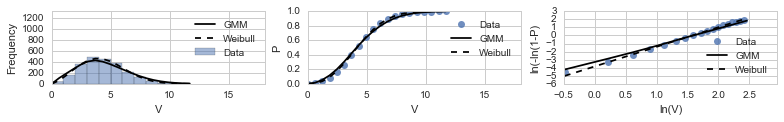

data size: 2271 weight 0.0693498641097
GMM Weibull
R square 0.950443013251 0.991221195249
max diff: 0.0397657135451 0.0170401341405 speed value: 3.07953436236 y gmm 0.303085836839
 
25.0 (15.0 - 35.0) degree


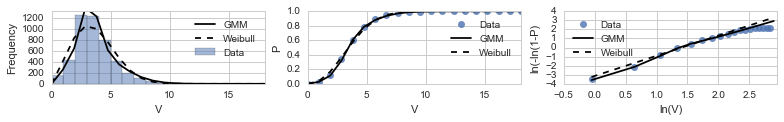

data size: 4696 weight 0.143402449079
GMM Weibull
R square 0.986544380869 0.937245552677
max diff: 0.0296527738796 0.0512367592772 speed value: 2.85520764 y gmm 0.318728827483
 
45.0 (35.0 - 55.0) degree


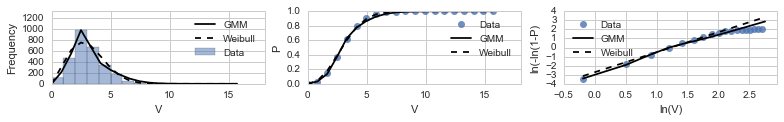

data size: 2820 weight 0.0861147586038
GMM Weibull
R square 0.989676657871 0.944238346914
max diff: 0.0400771330431 0.0330177079612 speed value: 4.96220189833 y gmm 0.864887405964
 
65.0 (55.0 - 75.0) degree


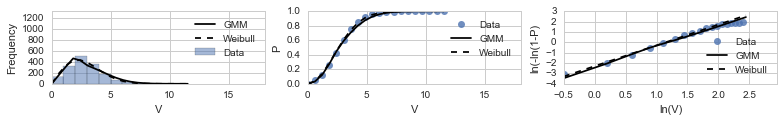

data size: 1591 weight 0.0485846031698
GMM Weibull
R square 0.935557152056 0.960946972524
max diff: 0.0552477662924 0.0293565450986 speed value: 4.24722066738 y gmm 0.800817601401
 
85.0 (75.0 - 95.0) degree


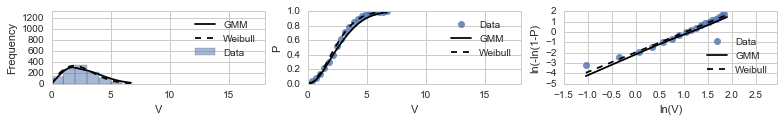

data size: 1113 weight 0.0339878462149
GMM Weibull
R square 0.909247612779 0.960291902769
max diff: 0.0798574227418 0.0458176251172 speed value: 3.89020392403 y gmm 0.770996126225
 
105.0 (95.0 - 115.0) degree


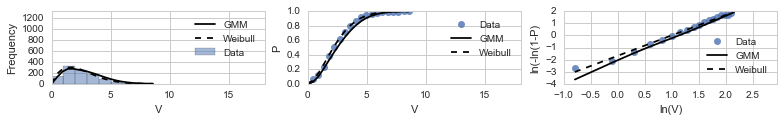

data size: 1049 weight 0.0320334687147
GMM Weibull
R square 0.9475415421 0.972947901026
max diff: 0.0751775762983 0.0381801523598 speed value: 3.16435263144 y gmm 0.645508791671
 
125.0 (115.0 - 135.0) degree


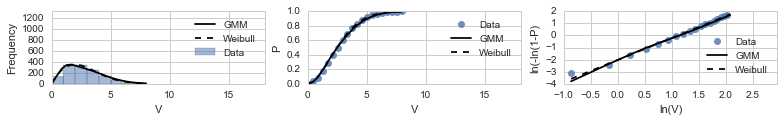

data size: 1326 weight 0.0404922588329
GMM Weibull
R square 0.978422736927 0.991135602747
max diff: 0.0248622682146 0.0158834979508 speed value: 4.6330108762 y gmm 0.859753116401
 
145.0 (135.0 - 155.0) degree


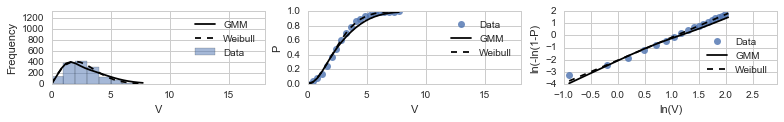

data size: 1445 weight 0.0441261794974
GMM Weibull
R square 0.901535492579 0.977109029775
max diff: 0.089585557913 0.0288562365325 speed value: 4.06477047294 y gmm 0.772698179111
 
165.0 (155.0 - 175.0) degree


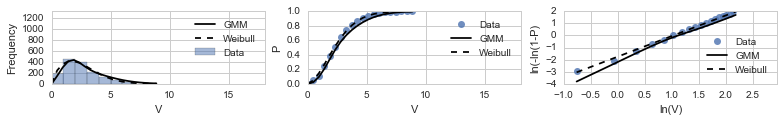

data size: 1484 weight 0.0453171282866
GMM Weibull
R square 0.967864436968 0.967156754992
max diff: 0.0715312397048 0.0291005878801 speed value: 3.26905195727 y gmm 0.669708652478
 
185.0 (175.0 - 195.0) degree


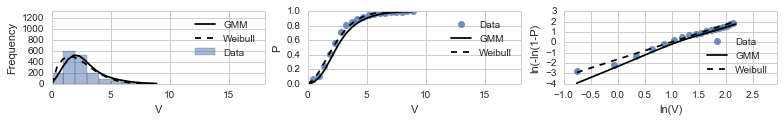

data size: 1700 weight 0.0519131523498
GMM Weibull
R square 0.902479896996 0.893179309848
max diff: 0.117300844528 0.0504501771462 speed value: 2.81078220858 y gmm 0.595052096649
 
205.0 (195.0 - 215.0) degree


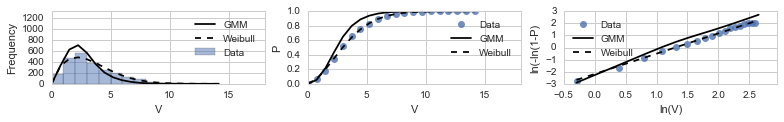

data size: 2278 weight 0.0695636241488
GMM Weibull
R square 0.898988232959 0.966870166034
max diff: 0.141023839003 0.023200084729 speed value: 3.72731132551 y gmm 0.798179238476
 
225.0 (215.0 - 235.0) degree


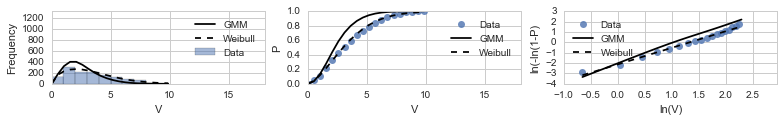

data size: 1324 weight 0.040431184536
GMM Weibull
R square 0.496573900733 0.928460752023
max diff: 0.202216436196 0.0267520438465 speed value: 3.63865784857 y gmm 0.798893173357
 
245.0 (235.0 - 255.0) degree


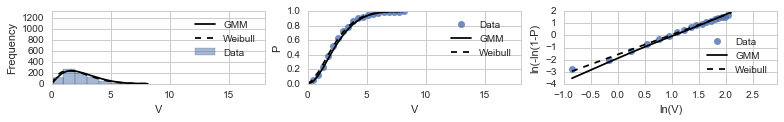

data size: 820 weight 0.0250404617217
GMM Weibull
R square 0.961892663896 0.955540788403
max diff: 0.0561421253829 0.0318224169898 speed value: 2.14217519668 y gmm 0.462150557544
 
265.0 (255.0 - 275.0) degree


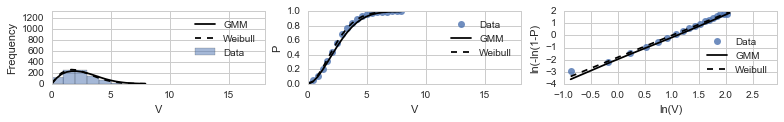

data size: 866 weight 0.02644517055
GMM Weibull
R square 0.957081183081 0.982847549422
max diff: 0.0663562362399 0.0222544248315 speed value: 2.92675827628 y gmm 0.619556003945
 
285.0 (275.0 - 295.0) degree


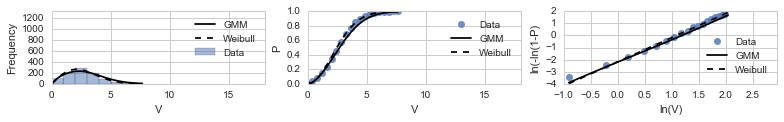

data size: 919 weight 0.0280636394174
GMM Weibull
R square 0.919378918507 0.96194713541
max diff: 0.0791840444366 0.0344389302586 speed value: 4.04210774392 y gmm 0.778269709644
 
305.0 (295.0 - 315.0) degree


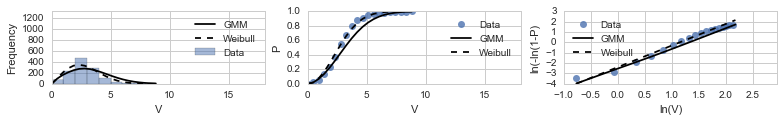

data size: 1233 weight 0.0376523040278
GMM Weibull
R square 0.736673844043 0.887603670127
max diff: 0.167825274849 0.0489766746258 speed value: 3.71674664057 y gmm 0.624551043074
 
325.0 (315.0 - 335.0) degree


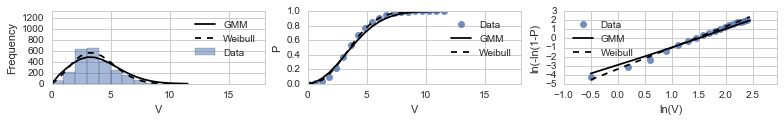

data size: 2475 weight 0.0755794423917
GMM Weibull
R square 0.868341095118 0.93954520798
max diff: 0.0631622386 0.0372533006032 speed value: 4.24434080177 y gmm 0.604312508875
 
345.0 (335.0 - 355.0) degree


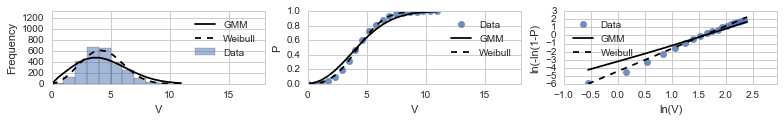

data size: 2674 weight 0.0816563349314
GMM Weibull
R square 0.818533115159 0.964140231408
max diff: 0.0882776218631 0.024791637134 speed value: 2.88527676419 y gmm 0.274515467787
 


In [57]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

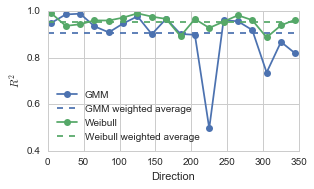

In [58]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")

(0.0, 0.25)

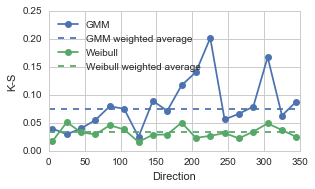

In [59]:
plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim)

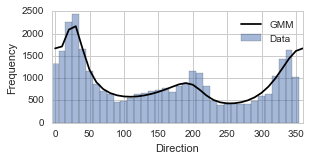

In [60]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [61]:
FRACTION = 1

In [62]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

225.0 (215.0 - 235.0) Degree Speed Distribution
0.190950386878 4.0 0.848050084763


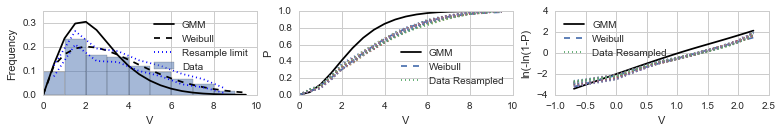

In [63]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
#     sub_df_resampled['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data Resampled', normed=True)  
    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()]

### 5.3.2 Time Variability

In [64]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

225.0 (215.0 - 235.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAFBCAYAAAD69Z+AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUFNXd//+u6q7ep2cGWQQG2ZRVRBBEtkRUfHRQ4sMj
RySCC5rjkriEb45LNEJ+UTSaYKJijPExEkxGiYg8hEVQBkRBWWQVQUB2Rbbp6XWqqrt+f7S3qK6p
6q7uqu7pnr6vczwy3V23b3d13Xd9PvezMJIkSaBQKBQKhZIWtqUnQKFQKBRKKUAFk0KhUCgUA1DB
pFAoFArFAFQwKRQKhUIxABVMCoVCoVAMQAWTQqFQKBQDUMGkUCgUCsUAVDApFAqFQjEAFUwKhUKh
UAxABZNCoVAoFANQwaRQKBQKxQBUMCkUCoVCMQAVTAqFQqFQDEAFk0KhUCgUA1DBpFAoFArFAFQw
KRQKhVIwDh8+jPvvvx+TJk3Crbfeirvvvht79+7Fiy++iH79+uHEiRPya0+fPo0LL7wQCxcuxNGj
R9GnTx+89tprKePdfffdmDp1akHmTgWTQqFQKAUhFovh3nvvxZ133om6ujq8+eabuO+++/Db3/4W
DMOge/fuWLp0qfz6//znP+jUqZP893nnnYcPPvhA/ruhoQGHDh0q2PztBXsnCoVCoRQNv/rVrzB/
/nxLx5w4cSKee+453ec/+ugjXHbZZbjooovkxwYMGIC5c+fipZdewrXXXoulS5fKFmN9fT3GjBkj
v7a6uhrV1dXYv38/evTogaVLl+Laa6/Fhg0bLP0celALk0KhUCgF4ciRI+jatav897333ospU6bg
mmuuwfHjx9G2bVt4PB4cOXIEhw4dQseOHeF0OlPGGDduHP7zn/8AAD788ENcddVVBZs/tTApFAql
DHnuuefSWoP5oGPHjtixY4f895w5cwAAN910E0RRBMMwsiAKgoDrr78ea9eulV/PMAyuuuoqTJ48
GRMmTEC7du2aCWo+oRYmhUKhUArClVdeiXXr1mHbtm3yYwcPHsR3330HhmEAAFdffTU+/PBDbN68
GcOGDWs2htvtRvfu3fHcc8/h+uuvBwBIklSQ+VMLk0KhUCgFwePx4C9/+Quef/55nDhxAqIowm63
47HHHsPXX38NAPD5fDj33HNTXLdqrr/+ejz55JOYPXs2vvnmG1ls8w0jFUqaKRQKhUIpYahLlkKh
UCgUA1DBpFAoFArFAFQwKWWLJEkQRbFgAQMUCqW0oUE/lLJDkiTE43EIgoCmpibYbDawLItEIgFJ
kuByucBxXMECCSgUSmlABZNSNkiShGg0ilAoBJfLBYfDAZZNOlkSiQSi0Sji8TgkSUIsFgPDMGBZ
Vv7PZrPBZrNRIaVQyhQqmJRWD7EoRVGEKIryv3mehyiKsoWpdM0SUUwkErLlSR4nQkr+b7fb5b8p
FErrhe5hUlotZI+yqalJriKSSCQAAE1NTRAEQX4Nz/Pyc5FIBJFIBLFYTBZVpZgqBbipqQnhcBjB
YBChUAiRSATRaBQ8z8vWKoVCSXLbbbdh+/btAABBEDBkyBD87//+r/z8lClT8NVXXzU77uOPP8b8
+fNx9OhR3HTTTYbfb9SoUfK433zzjcnZUwuT0gpRChqQtApFUUQ0GoUgCAAAlmXh8XhkkUwkErJo
EmElzykh1qjyP2JZkvcFIIux+nXErUtcwRRKOTFy5Ehs2rQJAwYMwMaNGzF69GisXr0ad9xxB3ie
x7fffos+ffo0O2706NEAgKNHj7aoJ4detZRWg5ZFGY/HEQwG0djYCEEQYLPZAABOpxMcx8liRtyq
QLL0ltfrhcfjkV9H9i6VwULRaBThcBjhcBjRaFS2WoloKvdHRVGEIAjyHmowGJSPi8ViNFqX0iJ0
66b9n1WvVzNixAhs3LgRALBmzRpMnDhR9s588cUXGDp0KDZs2IDJkydjypQp+PWvfw1RFPHee+/h
D3/4AwDg1KlTuPfee3HTTTfhlVdeAQA8+uijcs3Zjz/+GI8++qjxSWUBtTApJQ+x7IgLVMuitNvt
cLvdkCQJoVAo45jKvUr1exHrU/kfeX/1GGqLlIwLIMWK5Xk+5Rjy3jTQiNKa6NevH/bv3w8A2LBh
A375y19i+PDh+PTTT7F7926MGjUKjz/+OP71r3+hTZs2+NOf/oT33nsPdrtdvgai0Siee+45uN1u
/PSnP01p/5VvqGBSShYtoYzH45pCSS448niuKN2q6rkQ4VQKKXELK1G7dNVCSoRXHWhEnuM4Dk6n
kwYaUUxz4EB+X6+GYRj06dMHa9asQbt27cBxHEaPHo36+nrs3r0bP/3pT/HEE0/gwQcfhCRJ4Hke
I0aMwHnnnSeP0bt3b3i9XgDJXpoHVJPKp6eGCial5MhFKLXGsBItIZUkSdcizWV/VBRFxGIxOBwO
CIKQYoUqI3aVAkuhFBvDhw/Hq6++iuuuuw4AcMkll+Dll18Gy7Korq5Gx44dMWfOHPh8Pnz00Ufw
er04duyYfPy+ffsQjUbBcRy2bduGm266CevWrcOJEycAAF9++WXe5k4Fk1IykEAepeWVrVCmQylO
VpDOrUtE34hbl4in8njyNxFS5byVxzAMA7vdTt26lKJh5MiR+M1vfiP34uQ4DpWVlejbty8YhsFj
jz2Gn/3sZ0gkEqioqMCzzz6bIphVVVV46KGHcPr0adTW1qJnz56YOHEiHnvsMfzf//0fumlsqlr1
26fdSihFDxGXhoYGCIKAqqoqudAAEUqbzQaPx5NRKEVRRGNjI1wuFzwej7x3CJxNNXG73c1croVA
zxrVukQz7Y+qxyXH0EIMFEruUAuTUrRouV4BIBwOpwil2+1uFaXsMu2PCoIgR/8qLUslmfZHaSEG
CiV3qGBSig69PUoiECQ9xIxQlpJjhQgpEUmO48BxXFb7o8SizJQ/KkkSmpqa5GPUFikVUko5QwWT
UjRoCSVxvSpdpyQ/spwX7mz3R7WEVO2i1RNSZcUi9f6ozWbLab+YQilFqGBSWhwjQkn22oiFlesC
3doX9pbMHyWvkyQJdrsdDoej1X/flPKCCialxTAqlMT1GolELKuIo7SY1OOVkrvWKIXIHyXjkJB/
0g1GuT9KA40opQwVTErByVYoC7W4luMibkX+qHJ/U93xRb0/qjxGq75uOZ4DSulABZNSMMwKpRWL
KV2QM2PF/qggCEgkElkVqle6gmmhekoxQgWTkndI4XHg7GJsxqJsjS7TUsDI/ijpNwogq/1RZaF6
vf1RWoiB0tJQwaTkDWJFRCIRhMNheL1e2O32nIXSygWSiq51KK1BkgLkcDjAcZyl+6O0UD2lpaGC
SbEcrXQEAIjFYrLFYbPZ4HK5coqkpGJXGli9P6p26wL6heppIQZKPqCCSbEMvT1Kkggfj8fBsizc
bneLpRzQRbNlybQ/qmWR5po/Sv6tLMSgtkipkFKygQomxTR6QhmLxeTFCkgWWfb5fEWRQ6ksN6e0
SMhzlMKiFFK7/eyyZGX+qLKcIM/z4Hle9nLQQgwUI1DBpOSMEaFkWRYOhwOxWMyyhcgKQSPF3JWQ
uZF6rekKmlO0UbpGrSBf+aPK31CmQCO6P0ohUMGkZI1RoSSuV9LH0azQmV2sJElCNBqV/80wjByY
olw01dZLpn00SuGxYn8UOJvSonVeaaF6ihoqmBTDZCuUZBGxejHJVnglSUIsFksRbZZlUVlZmVI5
iLjpyCKotmCUKC0Q5V4YXThbjmz2R/VSX8zsj9JC9a0fKpiUjGgJpSRJiEQiaYVSa5xCQha0aDQq
z9vtdiMajWqKG/nbZrOB47iUcdLto5EcU0Db/UcT71sWrf1R0vvU6XQCgOZ5VY+RaX+UFqpv/VDB
pOiiFoNchdL

### 5.3.3 Adjacent Sector Variability

In [65]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

for curves in curve_collection:
    if curves['angle'] in angle_group:
        angle, data_size, x = curves['angle'], curves['data_size'], curves['x']
        y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
        y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']
        
        linestyle = '-' if angle == max_diff_angle else ':'
        alpha = 0.7 if angle == max_diff_angle else 0.3
        
        ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
        ax3.plot(x, y_weibull*data_size, linestyle, label=angle)
        
        start_angle, end_angle = angle-incre/2, angle+incre/2
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        
        x_3d = angle*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
        ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')
        
        count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
        ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)
        
        if legend_3d == False:
            ax1.legend()
            legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print max_diff_angle
print 'GMM, Weibull, Histogram'
align_figures()

225.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAFBCAYAAAD69Z+AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXm0FNW1/ldVPXffATQqiHqFMAqKTCIowQQNor48B56C
kmQ9kyzUmDxJ8nP2JnmJxqjBIRiH92IiMQo+gjNRcUJABRzQaCQKqAGRCHJvz91V3fX7o9l1T9et
6q6p+w59vrVYwL1ddU5VV53v7L2/vbegqqoKDg4ODg4OjooQe3oCHBwcHBwcfQGcMDk4ODg4OCyA
EyYHBwcHB4cFcMLk4ODg4OCwAE6YHBwcHBwcFsAJk4ODg4ODwwI4YXJwcHBwcFgAJ0wODg4ODg4L
4ITJwcHBwcFhAZwwOTg4ODg4LIATJgcHBwcHhwVwwuTg4ODg4LAATpgcHBwcHBwWwAmTg4ODg4PD
AjhhcnBwcHBwWAAnTA4ODg6OuuGf//wnfvCDH+C8887Dt771LSxcuBAffvgh7rjjDowZMwaff/65
9tkvvvgCY8eOxSOPPIKdO3di1KhRuPfee8vOt3DhQnzzm9+sy9w5YXJwcHBw1AXZbBYXX3wxvvOd
7+Chhx7CH//4R1xyySX4+c9/DkEQcOSRR2LVqlXa55988kkMHjxY+//hhx+OZ555Rvt/R0cHPvnk
k7rN31e3kTg4ODg4eg1+8pOf4OGHH/b0nHPnzsVNN91k+vvnn38eU6dOxdFHH639bNy4cbj//vvx
29/+FqeeeipWrVqlWYwvvvgiTjrpJO2zAwYMwIABA7Bt2zYMHToUq1atwqmnnoqNGzd6eh1m4BYm
BwcHB0ddsGPHDhxxxBHa/y+++GIsWLAAs2fPxu7du3HggQciEolgx44d+OSTTzBo0CAEg8Gyc5x2
2ml48sknAQDPPfccZs2aVbf5cwuTg4ODowFx0003VbQGa4FBgwbhb3/7m/b/O++8EwBw7rnnQlEU
CIKgEaIsyzjjjDOwdu1a7fOCIGDWrFmYP38+zjrrLHzpS1/qRqi1BLcwOTg4ODjqgq997Wt45ZVX
8Pbbb2s/+/jjj/HZZ59BEAQAwCmnnILnnnsOb7zxBo477rhu5wiHwzjyyCNx00034YwzzgAAqKpa
l/lzC5ODg4ODoy6IRCK46667cPPNN+Pzzz+Hoijw+Xy46qqr8MEHHwAAYrEYDjnkkDLXrR5nnHEG
2tvbsXjxYmzfvl0j21pDUOtFzRwcHBwcHH0Y3CXLwcHBwcFhAZwwOTg4ODg4LIATJkfDQlVVKIpS
N8EABwdH3wYX/XA0HFRVRaFQgCzLyOVykCQJoiiiWCxCVVWEQiH4/f66CQk4ODj6BjhhcjQMVFVF
JpNBMplEKBRCIBCAKJacLMViEZlMBoVCAaqqIpvNQhAEiKKo/ZEkCZIkcSLl4GhQcMLk6Pcgi1JR
FCiKov07n89DURTNwmRds0SKxWJRszzp50Sk9LfP59P+z8HB0X/BY5gc/RYUo8zlcloVkWKxCADI
5XKQZVn7TD6f136XTqeRTqeRzWY1UmXJlCXgXC6HVCqFRCKBZDKJdDqNTCaDfD6vWascHBwlfPvb
38Y777wDAJBlGZMmTcLvf/977fcLFizA+++/3+24l19+GQ8//DB27tyJc8891/J4J5xwgnbe7du3
u5w9tzA5+iFYQgNKVqGiKMhkMpBlGQAgiiIikYhGksViUSNNIlb6HQuyRtk/ZFnSuAA0MtZ/jty6
5Arm4GgkTJ8+Ha+//jrGjRuHTZs24cQTT8RLL72E//zP/0Q+n8euXbswatSobsedeOKJAICdO3f2
qCeHv7Uc/QZGFmWhUEAikUA8Hocsy5AkCQAQDAbh9/s1MiO3KlAqvRWNRhGJRLTPUeySFQtlMhmk
UimkUilkMhnNaiXSZOOjiqJAlmV0dnZi9+7d6Ojo0I7LZrNcrcvRI2hrM/7j1ef1mDZtGjZt2gQA
WLNmDebOnat5Z958801MnjwZGzduxPz587FgwQJcffXVUBQFK1euxC233AIA2Lt3Ly6++GKce+65
+N3vfgcAuPLKK7Wasy+//DKuvPJK65OyAW5hcvR5kGVHLlAji9Ln8yEcDkNVVSSTyarnZGOV+rHI
+mT/0Pj6c+gtUpYUWSs2n8+XHUNjc6ERR3/CmDFjsG3bNgDAxo0bsWjRIhx//PFYv349tmzZghNO
OAHXXHMNHnzwQQwcOBC33XYbVq5cCZ/Pp70DmUwGN910E8LhMM4///yy9l+1BidMjj4LI6IsFAqG
REkvHP3cKVi3qn4uRJwskZJbWI98Pl9GpkTQADTi5UIjjlrjo49q+3k9BEHAqFGjsGbNGnzpS1+C
3+/HiSeeiBdffBFbtmzB+eefj2uvvRb/9V//BVVVkc/nMW3aNBx++OHaOUaOHIloNAqg1EvzI92k
aump4YTJ0edA7k0iCytEqYfXL5URkaqq2s0iJQI1skitxkf1aS+sRUrXy4mUo7fi+OOPx913343T
Tz8dADBx4kQsWbIEoihiwIABGDRoEO68807EYjE8//zziEaj+PTTT7Xjt27dikwmA7/fj7fffhvn
nnsuXnnlFXz++ecAgPfee69mc+eEydFnQKSRTCaRyWTQ1NQEQRBsEWUlsOTkBYzcuhTnpB5+Vty6
ehKlPzRXImF23rIsw+fzIRgMwufzcbcuR6/B9OnTcd1112m9OP1+P1paWjB69GgIgoCrrroK3/ve
91AsFtHU1IQbb7yxjDBbW1tx2WWX4YsvvsCcOXMwbNgwzJ07F1dddRUef/xxtBkEVb169nm3Eo5e
D73rNZvNIpPJQJIkjWAkSUIkEqlKlIqiIB6PIxQKIRKJaLFDoIvMwuFwN5erV6AxQqEQfL7y/apZ
fNToFTWKjxJBF4tFpNNp+Hw+hEKhMtcuL8TAweEc3MLk6LUwi1HmcjkAJbemJEkIh8P9opSdF/FR
1o1Ln2NdtLwQAweHc3DC5Oh1MCNKKiRACIVCCIfDjhb2nnKsOJmr1fioPneULE0AmkVpJT5KGxK9
C5iO50TK0ajghMnRa2BElFTjlYhSkiT4fD6taHqjLt6V0l5oc0G/NyJTOodRbFRPpGzFIvYYoESq
lM/KwdHfwQmTo8dhlSjJ9UoWkBP0d4JlSVSSJIRCIQDu80eN3LpUwEFfBILHRzn6KzhhcvQY7BIl
m0bixdh0Lr17tj/q4LyKj5oVYQC6x0fZY3ghBo7+AE6YHHUHVdspFosIBoOWidLoPF6iERdxu/FR
o/q6VIPXSnyUYFZftxG/A46+A06YHHUDa1GmUikIggC/32+bKN0sqnxBro5K8VH6DskKpZ/pKyhZ
jY8CXYXqWVcwL1TP0RvBCZOj5jByvdJC29nZCcAaUXL0LPREKggC8vk8gsFgN3GR3fgoW6heX1+X
zkOxUl6IgaOnwAmTo2aoFKMkuCFKNy7Z/hin7CnUIj6qL8TAdprhheo5egqcMDk8hxUxD6G5udlx
CTu3c0ylUsjn89oCTZYNJ1Nv4EV8lHXHkqCI/f55oXqOeoITJodnMCPKbDZblgwfDoeRyWS6LX5O
xnN6jKIopoXQc7lct24i+tQKDmeoFh81skgJ+Xwe+XzeVnxUX4hBb5FyIuWwA06YHK5hhygDgQAE
QUA2mzW0KGoFsnDZHM5oNKrFU8ntR42n2aLmLHjlmy54aYmzRMrW2KXawVQGEYDj/FGjQvW8EAOH
HXDC5HAMJ0RJYBexWrpkaT7ZbFabT7FYhCRJCAaDmrpTkiQtvhYIBODz+Sy7DqtZPP0dtbxOureF
QgGBQEAjTa/io0CX0IhaxFHRel6IgUMPTpgctsHG/0KhkEY2VojS63mYgZ0PkTLNp6Ojo+qcKrkO
rVbMMVqoeXz

# 6. Result Variability & Cross-Validation

In [66]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.811   1.375   0.147  3.103  2.261  -0.064
2  0.100  -1.339  -0.147  1.109  0.855   0.337
3  0.090   2.385   1.490  1.001  0.461   0.057

GMM Plot Result
0.810585000895 [[ 1.37450306  0.1468554 ]] [ 2.25132719  3.10998935] -95.6613983716
0.0998732305892 [[-1.33857683 -0.14701583]] [ 0.75836487  1.17707078] -64.0279246452
0.0895417685163 [[ 2.38523466  1.4902228 ]] [ 0.45990107  1.00140323] -88.1084356565


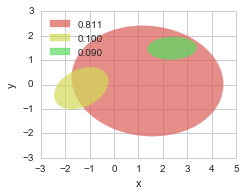

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.969  0.033      0.128  0.000001      0.034       0.273

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.966  0.035      0.120  0.000002      0.035       0.283

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.536   2.776  -0.019  2.170  2.349  0.027
2  0.355  -1.203   0.178  1.580  1.631  0.229
3  0.109   2.384   1.497  0.930  0.324  0.068

GMM Plot Result
0.53570713689 [[ 2.77609398 -0.01904584]] [ 2.16494435  2.35387661] 170.49922863
0.355429514471 [[-1.20251877  0.17756759]] [ 1.40802083  1.78111647] 138.969050915
0.108863348639 [[ 2.38397678  1.49696504]] [ 0.32284798  0.93072095] -88.4527574454


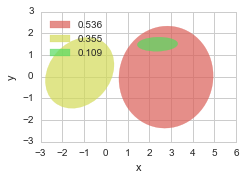

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.954  0.041      1.157  0.000002      0.040       0.333

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.962  0.044      0.818  0.000002      0.037       0.303

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.538   2.794  0.010  2.163  2.372  0.044
2  0.358  -1.277  0.148  1.552  1.682  0.241
3  0.104   2.309  1.489  0.889  0.328  0.073

GMM Plot Result
0.538104052571 [[ 2.79391478  0.00950117]] [ 2.15100651  2.38276532] 167.121600212
0.357625428827 [[-1.27737754  0.14805706]] [ 1.3984809   1.81133726] 144.229981511
0.104270518602 [[ 2.30911435  1.48878258]] [ 0.32651725  0.88893947] -88.2259782094


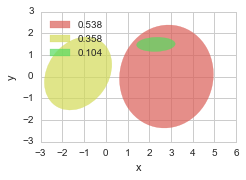

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.960  0.040      0.702  0.000002      0.037       0.307

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.962  0.038      0.655  0.000002      0.037       0.301

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.527   2.836  -0.034  2.104  2.354  0.069
2  0.359  -1.267   0.159  1.544  1.688  0.210
3  0.114   2.314   1.490  0.920  0.324  0.057

GMM Plot Result
0.526814554617 [[ 2.83627593 -0.03397141]] [ 2.08141062  2.37412654] 164.208628457
0.358747150723 [[-1.26742763  0.15904615]] [ 1.42203191  1.79205439] 146.482826406
0.11443829466 [[ 2.31429735  1.49011476]] [ 0.32305749  0.91982105] -88.693772032


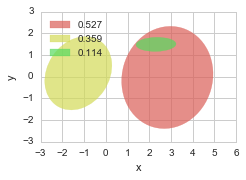

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.962  0.039      0.757  0.000002      0.037       0.301

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.961  0.044      0.802  0.000002      0.037       0.303

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.491   2.999  -0.095  2.058  2.349  0.059
2  0.405  -1.115   0.199  1.661  1.717  0.256
3  0.104   2.354   1.491  0.863  0.324  0.106

GMM Plot Result
0.490903847501 [[ 2.99870029 -0.09497529]] [ 2.04380559  2.36228938] 168.039477426
0.405168858423 [[-1.11513767  0.1987886 ]] [ 1.45553884  1.89426955] 138.637356954
0.103927294076 [[ 2.35403867  1.49104781]] [ 0.32233881  0.86389848] -87.3515581084


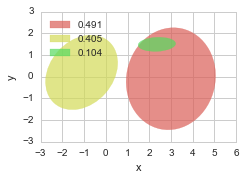

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.959  0.037      0.491  0.000002      0.038       0.313

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.962  0.036      0.470  0.000002      0.037       0.303

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.799   1.406   0.121  3.095  2.286  -0.051
2  0.108  -1.298  -0.156  1.140  0.910   0.354
3  0.094   2.404   1.482  1.000  0.447   0.083

GMM Plot Result
0.798733548069 [[ 1.40625091  0.12101972]] [ 2.27988571  3.09956358] -94.7195579827
0.107559061417 [[-1.29751758 -0.15585854]] [ 0.79186513  1.22478846] -61.3524651072
0.0937073905145 [[ 2.4043235   1.48218796]] [ 0.4449363   1.00124192] -87.3532254653


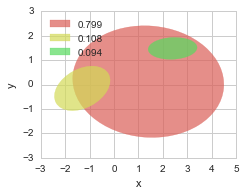

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.965  0.033      0.115  0.000002      0.035       0.290

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.966  0.035      0.113  0.000002      0.035       0.283

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.800   1.394   0.165  3.099  2.280  -0.070
2  0.109  -1.233  -0.086  1.199  0.924   0.417
3  0.091   2.456   1.493  0.987  0.454   0.086

GMM Plot Result
0.79962627158 [[ 1.39384774  0.1648934 ]] [ 2.26750631  3.10761988] -96.3512930198
0.109402914381 [[-1.23287076 -0.08553524]] [ 0.77414952  1.30093723] -61.1928534518
0.0909708140395 [[ 2.45585886  1.49321645]] [ 0.45138435  0.9874928 ] -87.1439666167


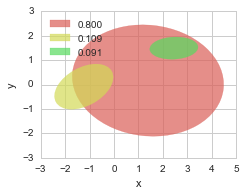

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.964  0.035      0.133  0.000002      0.037       0.296

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.966  0.036      0.125  0.000002      0.035       0.284

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.803   1.392   0.144  3.102  2.277  -0.081
2  0.107  -1.238  -0.140  1.207  0.885   0.432
3  0.090   2.395   1.496  0.976  0.445   0.088

GMM Plot Result
0.802700395662 [[ 1.39195918  0.14407883]] [ 2.26094135  3.11386245] -97.2718189118
0.106936366611 [[-1.23830156 -0.14000014]] [ 0.74092047  1.30059798] -63.0805484238
0.0903632377267 [[ 2.39545714  1.49621187]] [ 0.44287593  0.97688359] -87.1112402149


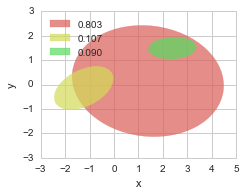

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.966  0.034      0.135  0.000002      0.036       0.288

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.966  0.036      0.129  0.000002      0.035       0.284

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.532   2.806  -0.031  2.160  2.335  0.071
2  0.363  -1.278   0.148  1.590  1.669  0.247
3  0.105   2.301   1.486  0.925  0.335  0.085

GMM Plot Result
0.531503870569 [[ 2.80561746 -0.03137048]] [ 2.12747139  2.36464352] 158.868404511
0.3630676914 [[-1.27849489  0.14812116]] [ 1.41064255  1.82326337] 140.599245544
0.10542843803 [[ 2.30070646  1.48630767]] [ 0.33380128  0.92504058] -87.9683374157


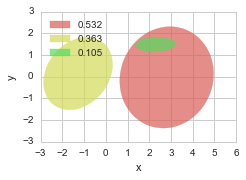

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.961  0.036      0.527  0.000002      0.037       0.307

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.962  0.036      0.570  0.000002      0.037       0.301

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.529   2.810  -0.044  2.191  2.358  0.064
2  0.367  -1.211   0.177  1.610  1.660  0.243
3  0.104   2.363   1.489  0.885  0.330  0.065

GMM Plot Result
0.529482058516 [[ 2.81040375 -0.04427168]] [ 2.16331123  2.38393127] 159.530995746
0.366953974116 [[-1.21113281  0.17658286]] [ 1.42101471  1.82366237] 138.599854566
0.103563967368 [[ 2.36320548  1.48901242]] [ 0.32904531  0.88573105] -88.3833935284


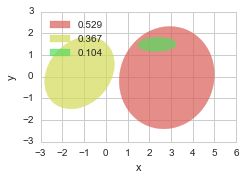

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.957  0.039      0.676  0.000002      0.039       0.319

R_square    K_S Chi_square       MSE RMSE / Max RMSE / Mean
0    0.962  0.037      0.591  0.000002      0.037       0.301

In [67]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, fit_method=FIT_METHOD, 
                     config=config, number_of_gaussian=NUMBER_OF_GAUSSIAN, )
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print ' '

## 6.2 Cross-validation, to select the number of Gaussian

In [68]:
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, fit_method = FIT_METHOD, 
                         config=config, number_of_gaussian=number_of_gaussian)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 24560.25 8186.75
  
Number of gaussian 1
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.130080  0.035183  0.000006    0.067493     0.552615  0.872943
1    0.131563  0.036767  0.000006    0.069477     0.551200  0.872012
2    0.131425  0.035502  0.000006    0.066678     0.557506  0.871255
3    0.128450  0.036986  0.000006    0.067798     0.542727  0.874137

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.147064  0.042853  0.000006    0.070388     0.557783  0.866474
1    0.129568  0.039699  0.000006    0.064349     0.558983  0.870686
2    0.151598  0.031804  0.000006    0.071911     0.537076  0.874567
3    0.143473  0.030081  0.000007    0.069678     0.590302  0.862114

  
Number of gaussian 2
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    2.129514  0.031687  0.000004    0.053843     0.439085  0.918275
1    9.687231  0.031006  0.000004    0.054117     0.435324  0.920685
2    9.306082  0.035137  0.000004    0.053549     0.440484  0.919072
3    6.316845  0.032003  0.000004    0.054389     0.438525  0.919347

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0   34.168106  0.030887  0.000004    0.056031     0.449534  0.917939
1    1.432599  0.035858  0.000004    0.054684     0.456869  0.911897
2    4.192848  0.034930  0.000004    0.056750     0.443172  0.916252
3    6.007147  0.031929  0.000004    0.053674     0.445452  0.916714

  
Number of gaussian 3
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.147499  0.033425  0.000002    0.034751     0.278277  0.967172
1    0.117836  0.035038  0.000002    0.034810     0.282423  0.966385
2    0.114535  0.034281  0.000002    0.035158     0.289343  0.965332
3    0.133216  0.034414  0.000002    0.034460     0.280402  0.967027

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.167579  0.033951  0.000002    0.038685     0.327416  0.956537
1    0.125469  0.033033  0.000002    0.037121     0.302467  0.962196
2    0.128289  0.036973  0.000002    0.037023     0.288733  0.963697
3    0.146355  0.036563  0.000002    0.038180     0.308376  0.960117

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.443966  0.028466  9.171630e-07    0.026613     0.217383  0.980324
1    0.610437  0.032582  1.041748e-06    0.028916     0.231921  0.977264
2    0.307292  0.028664  9.535846e-07    0.027325     0.221449  0.979386
3    0.313715  0.029009  9.344621e-07    0.026801     0.219623  0.979768

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.450845  0.039103  0.000001    0.030548     0.243859  0.974512
1    0.822680  0.040429  0.000001    0.031950     0.269188  0.970327
2    0.414008  0.023957  0.000001    0.030313     0.247807  0.974434
3    0.392790  0.024363  0.000001    0.031408     0.248256  0.974154

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.119416  0.015483  5.384521e-07    0.020564     0.166586  0.988289
1    0.356825  0.033204  6.666284e-07    0.022852     0.185467  0.985521
2    0.051514  0.020686  4.317047e-07    0.018700     0.149214  0.990694
3    2.453947  0.048482  4.235293e-07    0.017810     0.147668  0.990890

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.136095  0.019798  7.146330e-07    0.023456     0.191999  0.984826
1    0.466559  0.037133  1.265875e-06    0.030095     0.255076  0.973062
2    0.071379  0.022601  7.632934e-07    0.023185     0.198221  0.983383
3    1.683771  0.046039  8.853044e-07    0.028117     0.214024  0.980614

  
Number of gaussian 6
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.025943  0.013856  2.514281e-07    0.014002     0.113870  0.994572
1    0.121552  0.022607  2.355436e-07    0.013447     0.110190  0.994889
2    0.117447  0.023355  2.552182e-07    0.014238     0.114715  0.994503
3    0.025784  0.014934  2.388760e-07    0.013689     0.110934  0.994814

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.036579  0.023778  4.848508e-07    0.019528     0.157998  0.989494
1    0.098936  0.023032  5.713179e-07    0.021714     0.171619  0.987794
2    0.228657  0.023040  4.898884e-07    0.019100     0.158857  0.989294
3    0.028325  0.014625  4.380800e-07    0.018397     0.150417  0.990648

In [69]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.130379  0.036110  5.890379e-06    0.067861     0.551012  0.872586
2    6.859918  0.032458  3.727668e-06    0.053975     0.438354  0.919345
3    0.128271  0.034289  1.549701e-06    0.034795     0.282611  0.966479
4    0.418852  0.029680  9.617396e-07    0.027414     0.222594  0.979186
5    0.745426  0.029464  5.150786e-07    0.019981     0.162234  0.988849
6    0.072681  0.018688  2.452665e-07    0.013844     0.112427  0.994694

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.142926  0.036109  6.113935e-06    0.069082     0.561036  0.868460
2   11.450175  0.033401  3.907358e-06    0.055285     0.448757  0.915700
3    0.141923  0.035130  1.829252e-06    0.037752     0.306748  0.960637
4    0.520081  0.031963  1.236802e-06    0.031055     0.252278  0.973356
5    0.589451  0.031393  9.072765e-07    0.026213     0.214830  0.980471
6    0.098124  0.021119  4.960343e-07    0.019685     0.159723  0.989308

R_square


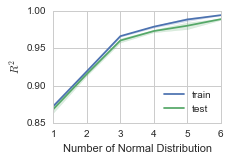

K_S


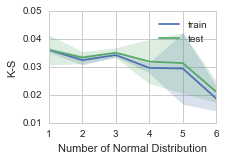

Chi_square


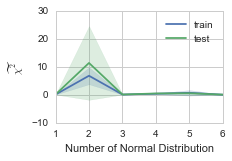

In [70]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print column
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Normal Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    plt.show()

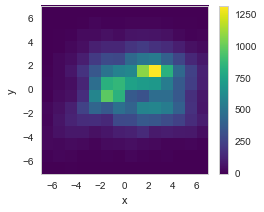

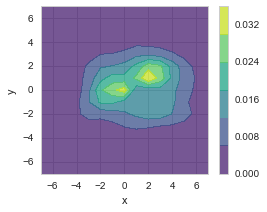

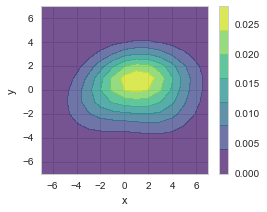

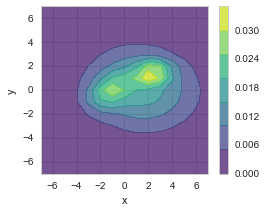

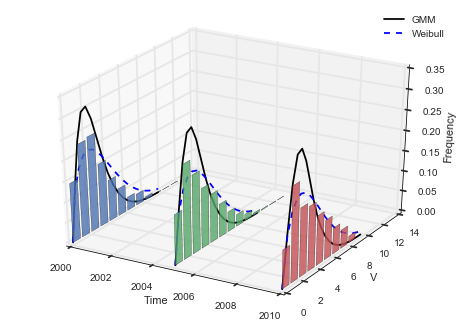

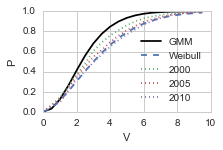

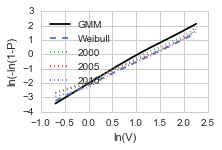

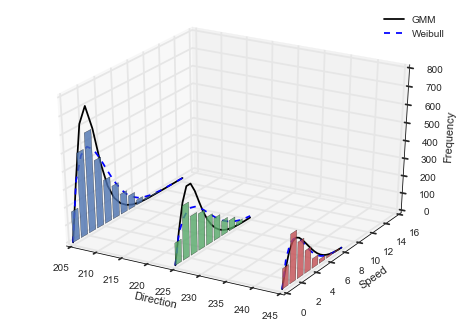

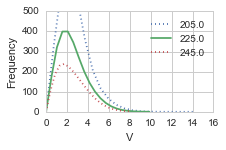

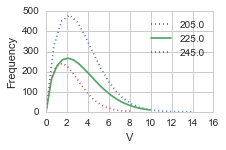

In [71]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)  

In [72]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)